In [ ]:
%env CUDA_VISIBLE_DEVICES=4

In [ ]:
import sys
sys.path.append('..')
from contrib.dmi.data import *
from contrib.dmi.load_data import *
from src.utils import *
from src.models import *

import matplotlib.pyplot as plt
import torch
import itertools

lon_min = -10
lon_max = 30
lat_min = 48
lat_max = 66

datamodule = BaseDataModule_wcoarse_wgeo(input_da=load_data_wcoarse_wgeo(path_obs="/DATASET/mbeauchamp/DMI/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC.nc",
                                                      path_tgt="/DATASET/mbeauchamp/DMI/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC.nc",     
                                                      path_oi="/DATASET/mbeauchamp/DMI/training_dataset/DMI-L4_GHRSST-SSTfnd-DMI_OI-NSEABALTIC.nc",
                                                      path_coarse="/DATASET/mbeauchamp/DMI/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC_w4DVarNet_coarse.nc",
                                                      path_topo="/DATASET/mbeauchamp/DMI/training_dataset/DMI-TOPO_NSEABALTIC.nc",
                                                      path_fgstd="/DATASET/mbeauchamp/DMI/training_dataset/DMI-FGSTD_NSEABALTIC.nc"),
                            domains={'train': {'time': slice('2019-05-01', '2020-12-31',)},
                                     'val': {'time': [ slice('2021-01-01', '2021-01-31',),
                                                       slice('2021-04-01', '2021-04-30',),
                                                       slice('2021-07-01', '2021-07-31',),
                                                       slice('2021-10-01', '2021-10-31',) ]},
                                     'test': {'time': slice('2021-06-01', '2021-06-30',)}},
                            xrds_kw={'patch_dims': {'time': 7, 'lat': 240, 'lon': 240},
                                     'strides': {'time': 1, 'lat': 5, 'lon': 5},
                                     'strides_test': {'time': 1, 'lat': 200, 'lon': 200},
                                     'domain_limits':  dict(lon=slice(lon_min, lon_max,),
                                                            lat=slice(lat_min, lat_max,)),
                                     },
                            dl_kw={'batch_size': 2, 'num_workers': 0},
                            res=0.02,
                            pads=[False,False,True],
                            norm_stats =[-0.015420883207237286,0.4562528584789277])
datamodule.setup()
data_loader = datamodule.train_dataloader()
test_dataloader = datamodule.test_dataloader()

In [ ]:
import sys
sys.path.append('..')
from contrib.dmi.data import *
from contrib.dmi.load_data import *
from src.utils import *
from src.models import *

import matplotlib.pyplot as plt
import torch
import itertools

lon_min = -10
lon_max = 30
lat_min = 48
lat_max = 66

datamodule = BaseDataModule_wgeo(input_da=load_data_wgeo(path_obs="/DATASET/mbeauchamp/DMI/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC.nc",
                                                      path_tgt="/DATASET/mbeauchamp/DMI/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC.nc",     
                                                      path_oi="/DATASET/mbeauchamp/DMI/training_dataset/DMI-L4_GHRSST-SSTfnd-DMI_OI-NSEABALTIC.nc",
                                                      path_topo="/DATASET/mbeauchamp/DMI/training_dataset/DMI-TOPO_NSEABALTIC.nc",
                                                      path_fgstd="/DATASET/mbeauchamp/DMI/training_dataset/DMI-FGSTD_NSEABALTIC.nc"),
                            domains={'train': {'time': slice('2019-05-01', '2020-12-31',)},
                                     'val': {'time': [ slice('2021-01-01', '2021-01-31',),
                                                       slice('2021-04-01', '2021-04-30',),
                                                       slice('2021-07-01', '2021-07-31',),
                                                       slice('2021-10-01', '2021-10-31',) ]},
                                     'test': {'time': slice('2021-06-01', '2021-06-30',)}},
                            xrds_kw={'patch_dims': {'time': 7, 'lat': 240, 'lon': 240},
                                     'strides': {'time': 1, 'lat': 5, 'lon': 5},
                                     'strides_test': {'time': 1, 'lat': 200, 'lon': 200},
                                     'domain_limits':  dict(lon=slice(lon_min, lon_max,),
                                                            lat=slice(lat_min, lat_max,)),
                                     },
                            dl_kw={'batch_size': 2, 'num_workers': 0},
                            res=0.02,
                            pads=[False,False,True],
                            norm_stats =[283.8052,4.2381434])
datamodule.setup()
data_loader = datamodule.train_dataloader()
test_dataloader = datamodule.test_dataloader()

<Figure size 1500x500 with 0 Axes>

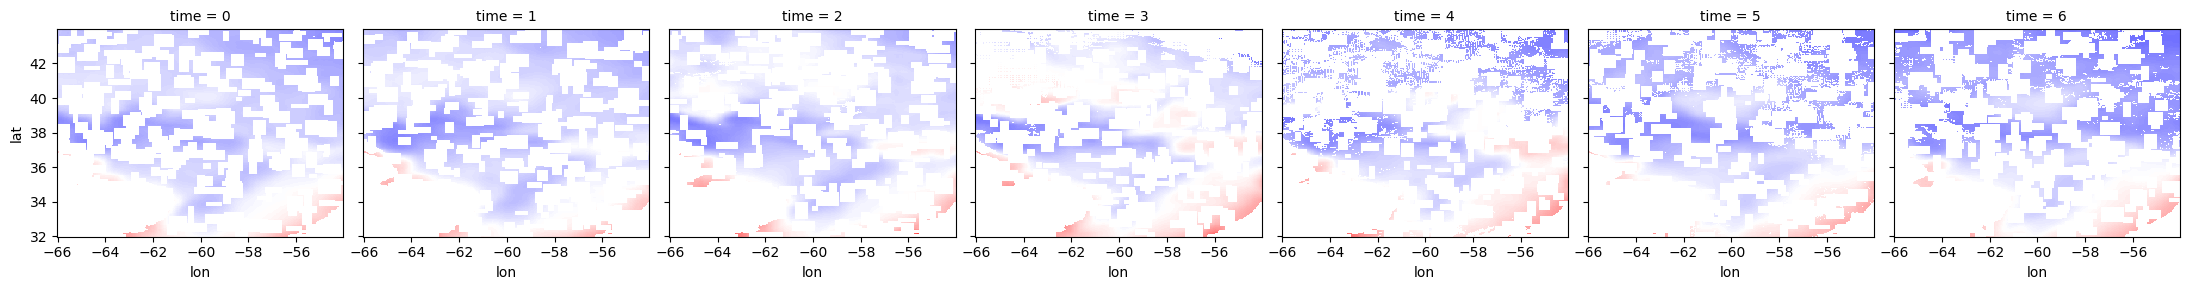

<Figure size 1500x500 with 0 Axes>

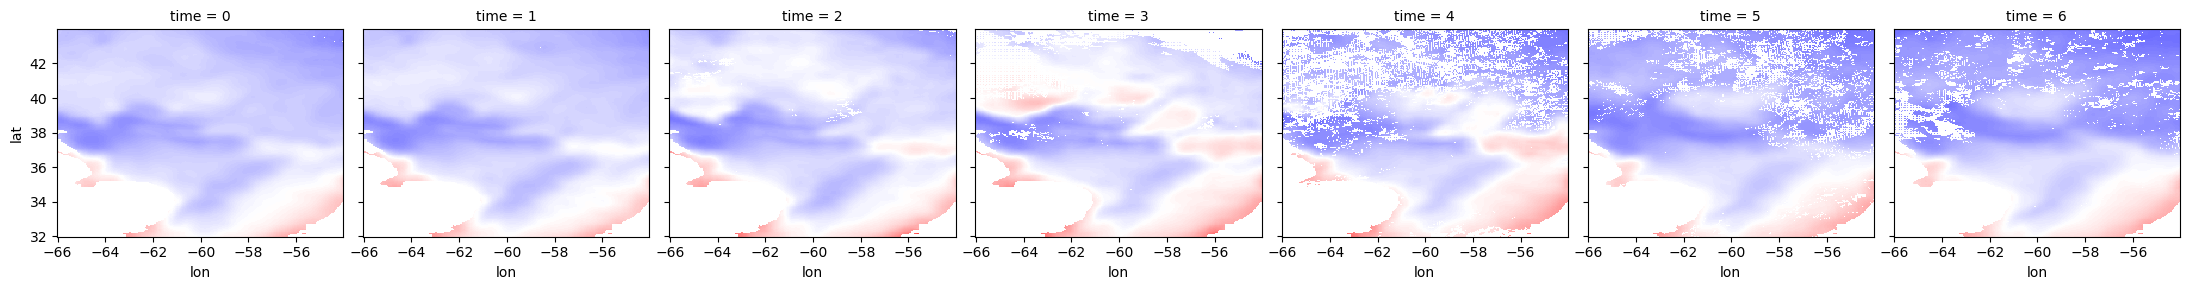

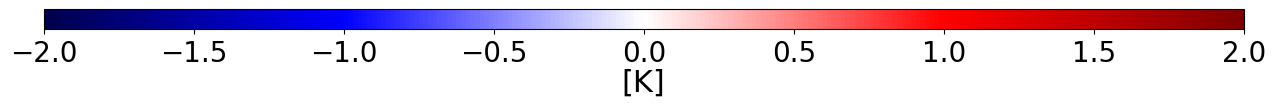

In [3]:
import cmocean as cmo
k=30
my_sample = next(itertools.islice(data_loader, k, None))

vmax = 2
vmin = -2.
cmap = plt.cm.seismic
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

fig = plt.figure(figsize=(15,5))
y = my_sample[0]
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),y[0])},
           coords={'time':np.arange(7),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',cmap=cmap,
                                                            col_wrap=7,
                                                            vmin=vmin,vmax=vmax,
                                                            add_colorbar=False)

plt.savefig('/DATASET/mbeauchamp/more_gappy_inputs.pdf', bbox_inches='tight')


fig = plt.figure(figsize=(15,5))
y = my_sample[1]
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),y[0])},
           coords={'time':np.arange(7),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',cmap=cmap,
                                                            col_wrap=7,
                                                            vmin=vmin,vmax=vmax,
                                                            add_colorbar=False)
plt.savefig('/DATASET/mbeauchamp/gappy_targets.pdf', bbox_inches='tight')

fig = plt.figure(figsize=(15,2))
# Colorbar
cbar_ax = fig.add_axes([0.1, 0.1, 0.8, 0.1])
cbar_ax.tick_params(labelsize=20)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', pad=3.0)
cbar.ax.set_title("[K]",fontsize=22,y=-3.5)
plt.savefig('/DATASET/mbeauchamp/standalone_colorbars.pdf', bbox_inches='tight')

# 1. Self attention mechanisms

In [4]:
import torch
from torch import nn
from torch.nn import functional as F
import math

class SelfAttention(nn.Module):
    def __init__(self, n_heads, d_embed, in_proj_bias=True, out_proj_bias=True):
        super().__init__()
        # This combines the Wq, Wk and Wv matrices into one matrix
        self.in_proj = nn.Linear(d_embed, 3 * d_embed, bias=in_proj_bias)
        # This one represents the Wo matrix
        self.out_proj = nn.Linear(d_embed, d_embed, bias=out_proj_bias)
        self.n_heads = n_heads
        self.d_head = d_embed // n_heads

    def forward(self, x, causal_mask=False):
        # x: # (Batch_Size, Seq_Len, Dim)

        # (Batch_Size, Seq_Len, Dim)
        input_shape = x.shape 
        
        # (Batch_Size, Seq_Len, Dim)
        batch_size, sequence_length, d_embed = input_shape 

        # (Batch_Size, Seq_Len, H, Dim / H)
        interim_shape = (batch_size, sequence_length, self.n_heads, self.d_head) 

        # (Batch_Size, Seq_Len, Dim) -> (Batch_Size, Seq_Len, Dim * 3) -> 3 tensor of shape (Batch_Size, Seq_Len, Dim)
        q, k, v = self.in_proj(x).chunk(3, dim=-1)
        
        # (Batch_Size, Seq_Len, Dim) -> (Batch_Size, Seq_Len, H, Dim / H) -> (Batch_Size, H, Seq_Len, Dim / H)
        q = q.view(interim_shape).transpose(1, 2)
        k = k.view(interim_shape).transpose(1, 2)
        v = v.view(interim_shape).transpose(1, 2)

        # (Batch_Size, H, Seq_Len, Dim / H) @ (Batch_Size, H, Dim / H, Seq_Len) -> (Batch_Size, H, Seq_Len, Seq_Len)
        weight = q @ k.transpose(-1, -2)
        
        if causal_mask:
            # Mask where the upper triangle (above the principal diagonal) is 1
            mask = torch.ones_like(weight, dtype=torch.bool).triu(1) 
            # Fill the upper triangle with -inf
            weight.masked_fill_(mask, -torch.inf) 
        
        # Divide by d_k (Dim / H). 
        # (Batch_Size, H, Seq_Len, Seq_Len) -> (Batch_Size, H, Seq_Len, Seq_Len)
        weight /= math.sqrt(self.d_head) 
        # (Batch_Size, H, Seq_Len, Seq_Len) -> (Batch_Size, H, Seq_Len, Seq_Len)
        weight = F.softmax(weight, dim=-1) 
        # (Batch_Size, H, Seq_Len, Seq_Len) @ (Batch_Size, H, Seq_Len, Dim / H) -> (Batch_Size, H, Seq_Len, Dim / H)
        output = weight @ v
        # (Batch_Size, H, Seq_Len, Dim / H) -> (Batch_Size, Seq_Len, H, Dim / H)
        output = output.transpose(1, 2) 
        # (Batch_Size, Seq_Len, H, Dim / H) -> (Batch_Size, Seq_Len, Dim)
        output = output.reshape(input_shape) 
        # (Batch_Size, Seq_Len, Dim) -> (Batch_Size, Seq_Len, Dim)
        output = self.out_proj(output) 
        # (Batch_Size, Seq_Len, Dim)
        return output

class CrossAttention(nn.Module):
    def __init__(self, n_heads, d_embed, d_cross, in_proj_bias=True, out_proj_bias=True):
        super().__init__()
        self.q_proj   = nn.Linear(d_embed, d_embed, bias=in_proj_bias)
        self.k_proj   = nn.Linear(d_cross, d_embed, bias=in_proj_bias)
        self.v_proj   = nn.Linear(d_cross, d_embed, bias=in_proj_bias)
        self.out_proj = nn.Linear(d_embed, d_embed, bias=out_proj_bias)
        self.n_heads = n_heads
        self.d_head = d_embed // n_heads
    
    def forward(self, x, y):
        # x (latent): # (Batch_Size, Seq_Len_Q, Dim_Q)
        # y (context): # (Batch_Size, Seq_Len_KV, Dim_KV) = (Batch_Size, 77, 768)

        input_shape = x.shape
        batch_size, sequence_length, d_embed = input_shape
        # Divide each embedding of Q into multiple heads such that d_heads * n_heads = Dim_Q
        interim_shape = (batch_size, -1, self.n_heads, self.d_head)
        
        # (Batch_Size, Seq_Len_Q, Dim_Q) -> (Batch_Size, Seq_Len_Q, Dim_Q)
        q = self.q_proj(x)
        # (Batch_Size, Seq_Len_KV, Dim_KV) -> (Batch_Size, Seq_Len_KV, Dim_Q)
        k = self.k_proj(y)
        # (Batch_Size, Seq_Len_KV, Dim_KV) -> (Batch_Size, Seq_Len_KV, Dim_Q)
        v = self.v_proj(y)

        # (Batch_Size, Seq_Len_Q, Dim_Q) -> (Batch_Size, Seq_Len_Q, H, Dim_Q / H) -> (Batch_Size, H, Seq_Len_Q, Dim_Q / H)
        q = q.view(interim_shape).transpose(1, 2) 
        # (Batch_Size, Seq_Len_KV, Dim_Q) -> (Batch_Size, Seq_Len_KV, H, Dim_Q / H) -> (Batch_Size, H, Seq_Len_KV, Dim_Q / H)
        k = k.view(interim_shape).transpose(1, 2) 
        # (Batch_Size, Seq_Len_KV, Dim_Q) -> (Batch_Size, Seq_Len_KV, H, Dim_Q / H) -> (Batch_Size, H, Seq_Len_KV, Dim_Q / H)
        v = v.view(interim_shape).transpose(1, 2) 
        
        # (Batch_Size, H, Seq_Len_Q, Dim_Q / H) @ (Batch_Size, H, Dim_Q / H, Seq_Len_KV) -> (Batch_Size, H, Seq_Len_Q, Seq_Len_KV)
        weight = q @ k.transpose(-1, -2)
        # (Batch_Size, H, Seq_Len_Q, Seq_Len_KV)
        weight /= math.sqrt(self.d_head)
        # (Batch_Size, H, Seq_Len_Q, Seq_Len_KV)
        weight = F.softmax(weight, dim=-1)
        # (Batch_Size, H, Seq_Len_Q, Seq_Len_KV) @ (Batch_Size, H, Seq_Len_KV, Dim_Q / H) -> (Batch_Size, H, Seq_Len_Q, Dim_Q / H)
        output = weight @ v
        # (Batch_Size, H, Seq_Len_Q, Dim_Q / H) -> (Batch_Size, Seq_Len_Q, H, Dim_Q / H)
        output = output.transpose(1, 2).contiguous()
        # (Batch_Size, Seq_Len_Q, H, Dim_Q / H) -> (Batch_Size, Seq_Len_Q, Dim_Q)
        output = output.view(input_shape)
        # (Batch_Size, Seq_Len_Q, Dim_Q) -> (Batch_Size, Seq_Len_Q, Dim_Q)
        output = self.out_proj(output)
        # (Batch_Size, Seq_Len_Q, Dim_Q)
        return output

# 2. VAE architectures

In [5]:
###############################################################################
# BSD 3-Clause License
#
# Copyright (c) 2018, NVIDIA CORPORATION. All rights reserved.
#
# Author & Contact: Guilin Liu (guilinl@nvidia.com)
###############################################################################

import torch
import torch.nn.functional as F
from torch import nn, cuda
from torch.autograd import Variable

class PConv2d(nn.Conv2d):
    def __init__(self, *args, **kwargs):

        # whether the mask is multi-channel or not
        if 'multi_channel' in kwargs:
            self.multi_channel = kwargs['multi_channel']
            kwargs.pop('multi_channel')
        else:
            self.multi_channel = False  

        if 'return_mask' in kwargs:
            self.return_mask = kwargs['return_mask']
            kwargs.pop('return_mask')
        else:
            self.return_mask = False

        super(PConv2d, self).__init__(*args, **kwargs)

        if self.multi_channel:
            self.weight_maskUpdater = torch.ones(self.out_channels, self.in_channels, self.kernel_size[0], self.kernel_size[1])
        else:
            self.weight_maskUpdater = torch.ones(1, 1, self.kernel_size[0], self.kernel_size[1])
            
        self.slide_winsize = self.weight_maskUpdater.shape[1] * self.weight_maskUpdater.shape[2] * self.weight_maskUpdater.shape[3]

        self.last_size = (None, None, None, None)
        self.update_mask = None
        self.mask_ratio = None

    def forward(self, input, mask_in=None):
        assert len(input.shape) == 4
        if mask_in is not None or self.last_size != tuple(input.shape):
            self.last_size = tuple(input.shape)

            with torch.no_grad():
                if self.weight_maskUpdater.type() != input.type():
                    self.weight_maskUpdater = self.weight_maskUpdater.to(input)

                if mask_in is None:
                    # if mask is not provided, create a mask
                    if self.multi_channel:
                        mask = torch.ones(input.data.shape[0], input.data.shape[1], input.data.shape[2], input.data.shape[3]).to(input)
                    else:
                        mask = torch.ones(1, 1, input.data.shape[2], input.data.shape[3]).to(input)
                else:
                    mask = mask_in
                        
                self.update_mask = F.conv2d(mask, self.weight_maskUpdater, bias=None, stride=self.stride, padding=self.padding, dilation=self.dilation, groups=1)

                # for mixed precision training, change 1e-8 to 1e-6
                self.mask_ratio = self.slide_winsize/(self.update_mask + 1e-8)
                # self.mask_ratio = torch.max(self.update_mask)/(self.update_mask + 1e-8)
                self.update_mask = torch.clamp(self.update_mask, 0, 1)
                self.mask_ratio = torch.mul(self.mask_ratio, self.update_mask)


        raw_out = super(PConv2d, self).forward(torch.mul(input, mask) if mask_in is not None else input)

        if self.bias is not None:
            bias_view = self.bias.view(1, self.out_channels, 1, 1)
            output = torch.mul(raw_out - bias_view, self.mask_ratio) + bias_view
            output = torch.mul(output, self.update_mask)
        else:
            output = torch.mul(raw_out, self.mask_ratio)


        if self.return_mask:
            return output, self.update_mask
        else:
            return output

In [6]:
import torch
from torch import nn
from torch.nn import functional as F

class VAE_PAttentionBlock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.groupnorm = nn.GroupNorm(32, channels)
        self.attention = SelfAttention(1, 2*channels)
    
    def forward(self, x, mask):
        # x: (Batch_Size, Features, Height, Width)

        residue = x 

        # (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height, Width)
        x = self.groupnorm(x)
        x = torch.cat([x,mask], dim=1)
        
        n, c, h, w = x.shape
        
        # (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height * Width)
        x = x.view((n, c, h * w)) 
        # (Batch_Size, Features, Height * Width) -> (Batch_Size, Height * Width, Features). Each pixel becomes a feature of size "Features", the sequence length is "Height * Width".
        x = x.transpose(-1, -2)
        # Perform self-attention WITHOUT mask
        # (Batch_Size, Height * Width, Features) -> (Batch_Size, Height * Width, Features)
        x = self.attention(x)
        # (Batch_Size, Height * Width, Features) -> (Batch_Size, Features, Height * Width)
        x = x.transpose(-1, -2)
        # (Batch_Size, Features, Height * Width) -> (Batch_Size, Features, Height, Width)
        x = x.view((n, c, h, w))
        x, mask = x[:,:(c//2),:,:] , mask
        # (Batch_Size, Features, Height, Width) + (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height, Width) 
        x += residue

        # (Batch_Size, Features, Height, Width)
        return x, mask

class VAE_PResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.groupnorm_1 = nn.GroupNorm(32, in_channels)
        self.conv_1 = PConv2d(in_channels, out_channels, kernel_size=3, padding=1, multi_channel=True, return_mask=True)

        self.groupnorm_2 = nn.GroupNorm(32, out_channels)
        self.conv_2 = PConv2d(out_channels, out_channels, kernel_size=3, padding=1, multi_channel=True,return_mask=True)

        if in_channels == out_channels:
            self.residual_layer = nn.Identity()
        else:
            self.residual_layer = PConv2d(in_channels, out_channels, kernel_size=1, padding=0, multi_channel=True, return_mask=True)
    
    def forward(self, x, mask):
        # x: (Batch_Size, In_Channels, Height, Width)

        residue = x
        residue_mask = mask
                
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, In_Channels, Height, Width)
        x = self.groupnorm_1(x)
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, In_Channels, Height, Width)
        x = F.silu(x)
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x, mask = self.conv_1(x, mask)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = self.groupnorm_2(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = F.silu(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x, mask = self.conv_2(x, mask)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        if isinstance(self.residual_layer,nn.Identity):
            return x + self.residual_layer(residue), mask
        else:
            res, mask = self.residual_layer(residue, residue_mask)
            return x + res, mask

class VAE_AttentionBlock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.groupnorm = nn.GroupNorm(32, channels)
        self.attention = SelfAttention(1, channels)
    
    def forward(self, x):
        # x: (Batch_Size, Features, Height, Width)

        residue = x 

        # (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height, Width)
        x = self.groupnorm(x)
        
        n, c, h, w = x.shape
        # (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height * Width)
        x = x.view((n, c, h * w)) 
        # (Batch_Size, Features, Height * Width) -> (Batch_Size, Height * Width, Features). Each pixel becomes a feature of size "Features", the sequence length is "Height * Width".
        x = x.transpose(-1, -2)
        # Perform self-attention WITHOUT mask
        # (Batch_Size, Height * Width, Features) -> (Batch_Size, Height * Width, Features)
        x = self.attention(x)
        # (Batch_Size, Height * Width, Features) -> (Batch_Size, Features, Height * Width)
        x = x.transpose(-1, -2)
        # (Batch_Size, Features, Height * Width) -> (Batch_Size, Features, Height, Width)
        x = x.view((n, c, h, w))
        # (Batch_Size, Features, Height, Width) + (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height, Width) 
        x += residue

        # (Batch_Size, Features, Height, Width)
        return x

class VAE_ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.groupnorm_1 = nn.GroupNorm(32, in_channels)
        self.conv_1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)

        self.groupnorm_2 = nn.GroupNorm(32, out_channels)
        self.conv_2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)

        if in_channels == out_channels:
            self.residual_layer = nn.Identity()
        else:
            self.residual_layer = nn.Conv2d(in_channels, out_channels, kernel_size=1, padding=0)
            
    def forward(self, x):
        # x: (Batch_Size, In_Channels, Height, Width)

        residue = x
                
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, In_Channels, Height, Width)
        x = self.groupnorm_1(x)
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, In_Channels, Height, Width)
        x = F.silu(x)
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x  = self.conv_1(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = self.groupnorm_2(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = F.silu(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = self.conv_2(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)

        return x + self.residual_layer(residue)

    
class VAE_Encoder(nn.Sequential):
    def __init__(self, in_channels=9, out_channels=28):
        super().__init__(
            # (Batch_Size, Channel, Height, Width) -> (Batch_Size, 128, Height, Width)
            PConv2d(in_channels, 128, kernel_size=3, padding=1,multi_channel=True, return_mask=True),  
             # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_PResidualBlock(128, 128),
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_PResidualBlock(128, 128),
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height / 2, Width / 2)
            PConv2d(128, 128, kernel_size=3, stride=2, padding=0, multi_channel=True,return_mask=True),
            # (Batch_Size, 128, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            VAE_PResidualBlock(128, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            VAE_PResidualBlock(256, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 4, Width / 4)
            PConv2d(256, 256, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 256, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            VAE_PResidualBlock(256, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 8, Width / 8)
            PConv2d(512, 512, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_PAttentionBlock(512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.GroupNorm(32, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.SiLU(), 

            # Because the padding=1, it means the width and height will increase by 2
            # Out_Height = In_Height + Padding_Top + Padding_Bottom
            # Out_Width = In_Width + Padding_Left + Padding_Right
            # Since padding = 1 means Padding_Top = Padding_Bottom = Padding_Left = Padding_Right = 1,
            # Since the Out_Width = In_Width + 2 (same for Out_Height), it will compensate for the Kernel size of 3
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8). 
            PConv2d(512, out_channels, kernel_size=3, padding=1, multi_channel=True,return_mask=True), 

            # (Batch_Size, 8, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8)
            PConv2d(out_channels, out_channels, kernel_size=1, padding=0, multi_channel=True, return_mask=True), 
        )

    def forward(self, x):
        # x: (Batch_Size, Channel, Height, Width)
        # noise: (Batch_Size, 4, Height / 8, Width / 8)

        mask = torch.where(x==0.,0.,1.)
        
        for module in self:

            if getattr(module, 'stride', None) == (2, 2):  # Padding at downsampling should be asymmetric (see #8)
                # Pad: (Padding_Left, Padding_Right, Padding_Top, Padding_Bottom).
                # Pad with zeros on the right and bottom.
                # (Batch_Size, Channel, Height, Width) -> (Batch_Size, Channel, Height + Padding_Top + Padding_Bottom, Width + Padding_Left + Padding_Right) = (Batch_Size, Channel, Height + 1, Width + 1)
                x = F.pad(x, (0, 1, 0, 1))
                mask = F.pad(mask, (0, 1, 0, 1))
                
            if (isinstance(module, nn.GroupNorm) or isinstance(module, nn.SiLU)):
                x = module(x)
            else:
                x, mask = module(x,mask)
                
        # (Batch_Size, 8, Height / 8, Width / 8) -> two tensors of shape (Batch_Size, 4, Height / 8, Width / 8)
        mean, log_variance = torch.chunk(x, 2, dim=1)
        # Clamp the log variance between -30 and 20, so that the variance is between (circa) 1e-14 and 1e8. 
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        log_variance = torch.clamp(log_variance, -30, 20)
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        variance = log_variance.exp()
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        stdev = variance.sqrt()
        
        # reparametrization trick: Transform N(0, 1) -> N(mean, stdev) 
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        noise = torch.Tensor(np.random.normal(size=mean.size(), scale=1.0)).to(x.device)
        x = mean + stdev * noise
        
        # Scale by a constant
        # Constant taken from: https://github.com/CompVis/stable-diffusion/blob/21f890f9da3cfbeaba8e2ac3c425ee9e998d5229/configs/stable-diffusion/v1-inference.yaml#L17C1-L17C1
        x *= 0.18215
        
        return x, mean, log_variance

class VAE_Decoder(nn.Sequential):
    def __init__(self,in_channels=14, out_channels=9):
        super().__init__(
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
            nn.Conv2d(in_channels, 4, kernel_size=1, padding=0),
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.Conv2d(4, 512, kernel_size=3, padding=1),   
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_AttentionBlock(512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_ResidualBlock(512, 512), 
            # Repeats the rows and columns of the data by scale_factor (like when you resize an image by doubling its size).
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 4, Width / 4)
            nn.Upsample(scale_factor=2),
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            nn.Conv2d(512, 512, kernel_size=3, padding=1), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 2, Width / 2)
            nn.Upsample(scale_factor=2), 
            # (Batch_Size, 512, Height / 2, Width / 2) -> (Batch_Size, 512, Height / 2, Width / 2)
            nn.Conv2d(512, 512, kernel_size=3, padding=1), 
            # (Batch_Size, 512, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            VAE_ResidualBlock(512, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            VAE_ResidualBlock(256, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            VAE_ResidualBlock(256, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height, Width)
            nn.Upsample(scale_factor=2), 
            # (Batch_Size, 256, Height, Width) -> (Batch_Size, 256, Height, Width)
            nn.Conv2d(256, 256, kernel_size=3, padding=1), 
            # (Batch_Size, 256, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_ResidualBlock(256, 128), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_ResidualBlock(128, 128), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_ResidualBlock(128, 128), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.GroupNorm(32, 128), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.SiLU(), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 3, Height, Width)
            nn.Conv2d(128, out_channels, kernel_size=3, padding=1), 
        )

    def forward(self, x):
        # x: (Batch_Size, 4, Height / 8, Width / 8)
        
        # Remove the scaling added by the Encoder.
        x /= 0.18215

        for module in self:
            x = module(x)

        # (Batch_Size, 3, Height, Width)
        return x

# VAE model

In [7]:
device='cuda'
from kornia.filters import sobel

class VAE(nn.Sequential):
    def __init__(self,in_channels=9, out_channels=28):
        super().__init__()
        self.encoder = VAE_Encoder(in_channels, out_channels).to(device)
        self.decoder = VAE_Decoder(out_channels//2,in_channels).to(device)
        
    def vae_loss(self, x, x_hat, mean, log_var, wKL=.01):
        err = x_hat-x
        err_grad = sobel(x_hat)-sobel(x)
        mask = torch.isnan(err)
        mask_grad = torch.isnan(err_grad)
        zeros= torch.zeros(err.size()).to(device)
        reproduction_loss = nn.functional.mse_loss(err[~mask], zeros[~mask], reduction='mean')
        grad_reproduction_loss = nn.functional.mse_loss(err_grad[~mask_grad], zeros[~mask_grad], reduction='mean')
        KLD = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())
        return reproduction_loss + .0001*grad_reproduction_loss + wKL*KLD, reproduction_loss, KLD
    
    def forward(self, x):
        # encoder
        z, mean, log_var = self.encoder(x)
        # decoder
        x_hat = self.decoder(z)
        return x_hat
        
vae = VAE(in_channels=7, out_channels=50)

# Training

In [15]:
#ckpt = torch.load('ckpt/ckpt_vae_dmi.pth', map_location=device)
#vae.load_state_dict(ckpt)

FileNotFoundError: [Errno 2] No such file or directory: 'ckpt/ckpt_vae_dmi.pth'

In [ ]:
#@title Training (double click to expand or collapse)

from IPython.display import clear_output
from torch.optim import Adam
from tqdm.autonotebook import tqdm

n_epochs =  1000#@param {'type':'integer'}
## learning rate
lr = 1e-3 #@param {'type':'number'}

optimizer = Adam(
        [
            {"params": vae.encoder.parameters(), "lr": lr},
            {"params": vae.decoder.parameters(), "lr": lr},
        ],
    )

tqdm_epoch = tqdm(range(n_epochs))
for epoch in tqdm_epoch:
  avg_loss = 0.
  num_items = 0
  for batch in data_loader:
    y = batch[0]
    x = batch[1]
    if x.isfinite().float().mean() < 0.25:
        continue
    y = y.nan_to_num().to(device)
    z, mean, log_var = vae.encoder(y)
    x_hat = vae.decoder(z)
    loss_vae, rec, KL = vae.vae_loss(x.to(device), x_hat, mean, log_var, wKL=0.00005)
    loss = loss_vae
    print(rec, KL)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    avg_loss += loss.item() * x.shape[0]
    num_items += x.shape[0]
  # Print the averaged training loss so far.
  tqdm_epoch.set_description('Average Loss: {:5f}'.format(avg_loss / num_items))
  # Update the checkpoint after each epoch of training.
  torch.save(ldm.state_dict(), 'ckpt/ckpt_vae_dmi.pth')

  0%|                                                                       | 0/1000 [00:00<?, ?it/s]

tensor(0.0690, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(167.8711, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(303.1138, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.1734, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0760, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(466.4383, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(249.9454, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(122.5334, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.9795, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(275.2690, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0490, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0293, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(352.9009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0555, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(234.6021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0357, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(281.5143, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0520, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(307.9989, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0487, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(639.7432, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0422, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(242.6954, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0727, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(297.2498, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0142, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(101.8856, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0423, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0123, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.1207, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(246.4980, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0450, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(82.3966, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0271, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(259.6950, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0398, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(250.5193, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(169.5657, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0440, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.4800, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0293, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.5191, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0319, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(276.8136, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.9315, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(338.9685, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.4691, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0576, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.9648, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(220.6356, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.8120, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0138, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.4219, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0437, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(416.5508, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0336, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(265.8925, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0645, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.4340, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(220.2422, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(265.3648, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0434, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(327.1437, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0441, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(218.9782, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.8043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(269.3607, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0897, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(419.3843, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.1234, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.8281, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(244.4864, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0474, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.8978, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0273, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(282.8803, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0092, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(136.0000, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0431, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0473, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(273.7654, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0388, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(321.4293, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(285.1345, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0588, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.6448, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(295.5451, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(300.8957, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.8446, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(307.0298, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0115, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0563, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(162.4527, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(266.4884, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(127.8552, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0557, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(275.9713, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0536, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.7110, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(258.9284, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(175.8521, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0658, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.4304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1082, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.9813, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(295.7682, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.3692, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.9431, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(272.3191, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(264.3582, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(260.4449, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(152.3629, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0170, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0410, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(261.0669, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0773, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.3535, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0253, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.2469, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0550, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(384.6477, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.4752, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0940, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(404.8315, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.9004, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.7890, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(189.3765, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.7778, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(222.3414, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(145.4935, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0763, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(435.0524, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0473, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(219.6004, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.3899, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(259.6379, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0357, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.5857, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(283.1155, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0376, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(440.0016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.4512, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0619, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(393.3257, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0793, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(487.9768, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0404, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(299.4967, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.7099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6129, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0166, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(308.2789, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0209, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(219.4321, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0891, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(195.1874, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0398, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(248.1877, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(266.8953, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0293, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(167.9985, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.1847, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.6521, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0088, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1085, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.3006, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.2542, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0391, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(373.4518, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0572, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(308.6429, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(282.8060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.5576, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.3313, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0402, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(140.1951, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0753, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(141.6188, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0126, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.6698, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0395, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(273.3023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0319, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(288.5587, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.0434, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(269.9686, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(193.9408, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0407, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(284.1005, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0216, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0216, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(238.5549, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1062, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(122.9359, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(199.1339, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(340.8224, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0294, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.7811, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0446, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(353.9740, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(114.8756, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.4362, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.1607, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.9777, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(76.0291, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0511, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(279.8687, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0440, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.6421, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.5122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0415, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(223.8342, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0093, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(82.9507, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0843, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(312.1497, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.4176, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0432, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(322.2389, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0670, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.5873, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(546.5536, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0372, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.8570, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(123.1150, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(232.6390, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0426, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(253.3461, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(116.7606, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.6193, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(121.2490, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(135.3828, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1116, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(288.3958, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(268.8661, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(283.9877, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(349.1959, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0737, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(267.1830, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0450, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(332.2754, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0403, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(293.7792, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.7605, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1411, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(263.3993, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0433, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(117.8384, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.5441, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0430, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0480, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(348.6752, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0348, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(129.2744, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.5480, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.2071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(234.4203, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.7641, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0819, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.8773, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(147.1213, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.3567, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0208, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(232.0955, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(272.6740, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0455, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(264.2687, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0072, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(306.3803, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5446, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.7914, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0409, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.0309, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(453.3922, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0658, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(380.7838, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0741, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(350.4674, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.4020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.4210, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0578, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(395.6483, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0706, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(275.2198, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(644.1005, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0358, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(258.5430, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0156, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(304.4225, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.2658, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.9379, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0483, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(321.5256, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0424, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(237.5465, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0749, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.3478, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.6566, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(237.4553, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0712, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0477, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(109.4130, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(386.4158, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(237.9090, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0421, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(215.2675, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0176, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(295.6443, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0709, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(320.9450, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.1723, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.9227, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0427, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0381, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(198.8509, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.9962, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(258.2898, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0944, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(228.0690, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0216, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(285.0803, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.1041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1311, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.6978, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0503, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(280.2854, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0412, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0349, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.3785, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(223.1710, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(261.8284, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(359.9808, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.7330, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0513, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(338.6423, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.6595, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(106.2285, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.0180, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(215.0945, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(238.2973, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0571, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(171.8756, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(185.1992, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0345, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.7025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(263.1779, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(208.3096, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0125, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0800, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(517.4205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.0150, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0789, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(108.4857, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(300.8775, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(95.5447, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(222.2999, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.4645, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1638, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.2101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0468, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(281.2996, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0345, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.0741, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0512, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(477.6577, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0329, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(97.9067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0865, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(285.0666, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.7472, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0672, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(257.6826, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0413, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.8622, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0309, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(424.8141, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0176, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(241.9586, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0537, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(487.6477, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.9710, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(247.6387, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0253, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(135.6422, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.8504, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0434, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(227.7050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0273, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(199.1130, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.7566, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(290.8490, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(296.0580, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.3893, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0936, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(97.5398, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.0018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0438, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(223.2048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0084, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.4083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.4654, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(356.6792, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(245.6618, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.2326, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0617, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.3722, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0345, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(201.7003, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.2178, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0093, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.1793, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0927, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(344.6168, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.8985, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0374, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(354.5368, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0620, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(536.8964, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0514, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(306.3241, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(220.2167, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(162.4438, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0170, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0391, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(275.1974, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(382.0486, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(140.6132, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0215, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.1928, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.3575, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0806, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(222.4705, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.1086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(136.8833, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0613, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.1141, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0400, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(217.5289, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0217, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.5254, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(227.4724, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.8794, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0101, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(103.9806, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2321, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.7415, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(264.6073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0512, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0100, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.0738, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0319, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(489.1900, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(239.8954, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(178.3554, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(246.6643, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0816, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.8459, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0432, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(301.9813, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0912, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(245.6861, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0635, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(266.0602, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0388, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(351.9467, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0459, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(363.9195, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0571, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(456.2100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(218.1392, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0243, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(366.5372, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(189.1292, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0426, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.9230, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(295.5040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0645, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(384.5860, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0431, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(201.5053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0636, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(298.5153, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.4447, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0216, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(448.4067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.3239, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0809, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(270.4622, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0167, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.0636, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0126, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.7177, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0396, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(265.9439, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(335.0167, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(299.9432, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0418, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.2469, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0288, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(286.0369, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0125, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(251.1866, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0843, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0336, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1072, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.5677, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1384, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(465.4015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(210.0173, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0266, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(137.8098, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0531, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(306.6114, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.5383, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0427, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(322.1059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0101, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.6400, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0351, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(387.2823, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.2153, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0632, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(162.6320, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0275, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(315.5974, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0202, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(171.1087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.8829, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0643, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(499.6133, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0380, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0462, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(613.7828, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6060, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(178.3468, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(267.2371, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(125.1864, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0209, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.3657, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0515, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(117.4597, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(306.9843, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0451, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.9238, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0604, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0800, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(608.3225, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0647, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(248.6095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0591, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(451.8087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.0157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0167, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(185.4721, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(272.2748, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0398, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(349.7093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.2509, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(232.9898, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(403.1919, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(349.0627, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(295.0582, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0537, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(299.9017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0205, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(439.1894, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(398.3242, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0347, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(264.4795, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0340, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(130.4183, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(281.9922, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0613, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(310.6893, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(277.2945, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0176, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(236.2162, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(273.1747, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(301.6660, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(295.7129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0442, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.5731, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.0622, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(106.8228, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0754, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(238.7268, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(162.7729, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0742, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(340.7757, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1358, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.4647, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0916, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(569.6377, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(315.6945, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(324.7835, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0110, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.9929, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0294, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(494.0893, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(447.0747, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0292, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.6812, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(520.1325, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(273.5936, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.0233, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0101, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(163.6011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0645, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(496.0909, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1028, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(584.0646, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0104, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(89.1579, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0441, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(225.0768, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.5180, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0511, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.7739, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0205, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(114.2657, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0839, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(201.6992, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(308.0515, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(398.3117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0286, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(284.5131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0202, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.9279, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(283.8288, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0670, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(343.3443, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0421, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.0869, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0375, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(241.0974, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0119, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(400.9730, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(163.5991, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0401, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.5379, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0711, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.2149, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1018, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(375.1046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0448, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.5323, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(284.9498, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0293, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(234.4584, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(222.3818, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(104.2500, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(317.6375, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.6839, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1061, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(356.0351, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.5699, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0696, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1058, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(603.8276, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0371, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(195.3808, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0996, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(414.7554, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0408, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(358.2834, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0783, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(178.3692, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0900, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.8236, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0138, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.6204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0414, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.7687, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0660, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0395, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(426.1899, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9578, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(377.0829, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0137, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(127.3954, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0699, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(241.7018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0608, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0208, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(261.4577, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0473, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.0919, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(121.2436, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0324, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0314, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.9511, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(93.0964, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(280.5976, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0804, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(198.7590, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0145, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(274.3788, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0364, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.5852, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0509, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(363.6324, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(317.8761, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0442, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(664.6506, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0083, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(240.9603, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.5987, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(264.7868, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0681, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(277.6147, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.5724, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0292, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(623.1838, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(223.1277, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0269, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(329.8281, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0404, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.0204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(135.3826, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(438.6649, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0484, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.8759, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0286, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(303.2099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.0322, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(238.7317, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0375, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(292.6316, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0464, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(119.7437, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(270.0626, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(222.0183, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(163.5745, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.1419, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(502.7806, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0469, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(224.6346, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0359, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0875, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(360.1701, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0706, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(359.4101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0511, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(241.9581, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.0311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(352.7401, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0446, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.0205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0062, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.0526, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0271, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.6715, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(129.0349, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0606, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.1169, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0429, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(202.8178, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(130.4653, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0439, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(600.9423, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(267.7551, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0625, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.5939, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0144, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.0657, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0497, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(197.7536, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(279.0561, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0095, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(136.5258, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0503, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(365.9521, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(253.4349, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0379, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(677.4119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0340, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(195.0836, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.8863, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0496, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(240.4337, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0378, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(133.7169, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0480, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.3208, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0114, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.0707, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0410, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(112.7520, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0745, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(440.4797, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(210.0742, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(324.1252, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0358, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0356, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(423.6955, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.2386, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0539, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.3560, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(275.0869, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0465, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.5155, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0430, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(256.8006, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0856, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(257.3549, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0208, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(232.7047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0336, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0506, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.4384, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0345, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.3254, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(210.4138, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(217.2759, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.6854, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0627, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(328.3652, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(268.9234, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0308, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(431.5788, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1092, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(82.6029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(195.6371, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(374.4865, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.5982, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0774, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.0388, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0774, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(219.0646, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0638, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.6128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0686, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.9413, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0443, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(245.3224, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(269.6156, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.7870, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.7628, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0546, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(343.5865, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0216, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(282.5567, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0426, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(283.3071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0476, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(330.0562, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0563, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1538, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(355.4502, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0863, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(423.7830, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0217, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.5204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.5698, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0406, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(312.6652, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(688.9885, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(523.7855, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0378, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(226.6572, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0335, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(351.2706, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0445, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(432.8202, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0500, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(260.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(292.4501, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.8455, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(273.7372, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(294.0951, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.0865, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0315, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.0865, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(225.1466, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(197.2171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.3860, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(178.1647, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(130.3835, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(220.1879, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(202.3352, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0527, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0315, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(152.1544, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0389, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(239.1878, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0529, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.2243, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0099, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(85.3533, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(300.3868, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.0246, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(306.6589, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0422, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(266.1802, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(304.2791, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0845, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.6121, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(403.9286, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.9545, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0497, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(303.0198, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0209, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(365.3190, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0588, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(250.6343, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(297.1006, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.4491, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(246.9071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0933, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(112.9547, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3771, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(451.3929, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(243.3038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.3475, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.8882, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0527, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(201.8154, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1099, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(258.6975, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0253, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.2867, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.3938, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0520, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.8497, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(193.1265, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(175.1205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0589, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(297.7223, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(125.3755, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0082, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(147.6275, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0308, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(137.8939, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.3580, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(202.4126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.5890, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(213.2831, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0523, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(217.9386, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0382, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(236.3745, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.2880, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(141.0089, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.5554, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0565, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(234.9994, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0296, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.2901, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0082, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(140.2627, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.3298, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0678, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0120, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(213.4428, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0578, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(316.3199, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(152.2695, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(152.0482, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.3174, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0202, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(120.8141, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.3144, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0125, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(104.1114, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0337, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(135.0815, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0527, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.8301, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(130.8068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(283.3654, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(136.9073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0415, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.5128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(466.7175, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0604, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(330.2944, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0645, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.3323, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0137, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(406.8927, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0040, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(94.6273, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2037, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(304.0373, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.7664, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(274.6241, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0144, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(152.2479, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.8388, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0508, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(493.4734, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(528.5361, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0418, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.3424, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(359.5129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.4063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.0205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1485, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(280.3574, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(82.3182, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0345, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0104, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.0483, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0329, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(237.6045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0275, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.7815, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(288.5001, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0140, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.1989, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0205, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.5925, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0410, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(269.0193, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(308.4544, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0134, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.0367, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0271, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(326.4308, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.1419, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0503, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(573.6770, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(222.9380, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0607, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(263.1074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(306.5545, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0392, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(415.9706, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0942, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(202.3815, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(198.5231, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(266.6559, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(198.5544, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(208.8339, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0985, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.5625, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(261.7979, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.7491, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0352, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(505.5747, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.7104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(108.3589, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(320.9571, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0533, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(297.7725, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(364.1804, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(378.2676, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(122.6225, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(229.8692, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(326.2105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0689, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(199.8605, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0403, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(362.5454, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(233.2579, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1044, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(639.0340, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.4576, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.0664, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0376, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(286.0740, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(310.6181, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0939, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(116.6931, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(127.1960, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(402.1851, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0324, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(263.7893, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(242.8436, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(275.3917, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.1937, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0722, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.6421, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(178.8403, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(301.2646, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.7596, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(259.0180, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0391, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(237.5893, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.1248, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0110, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(197.4971, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.5900, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0340, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(264.8699, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5881, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.0597, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.9246, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(344.3062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0522, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.0856, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(238.5099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(124.7294, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.8454, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.7186, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0892, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(403.0969, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0209, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.9617, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(147.4965, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0110, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.3115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(294.8039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(163.4023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0095, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.1651, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.6420, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0103, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(244.0845, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0812, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.3958, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0145, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.5423, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(229.5963, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.5218, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(247.6644, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0575, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(282.3942, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.1594, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(122.0190, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.5063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(305.3568, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.0962, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.8042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(229.6183, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(301.2956, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0462, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(256.2850, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0347, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(237.7983, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.5711, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0216, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(303.1472, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(271.2091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(259.5959, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0320, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0319, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.5716, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(579.1445, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.6239, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0352, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(347.7775, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(349.0628, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.8517, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0389, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(169.5450, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(223.2670, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0406, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(216.8240, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(315.4190, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0673, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.3051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(117.5178, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.6724, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0282, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.2664, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0351, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.1445, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0375, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(163.3235, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0571, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.9927, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0687, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(344.5844, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.0513, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(224.8575, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(111.5248, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(167.0715, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(242.9511, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(198.5370, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(110.0543, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(124.6242, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0348, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.1505, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0547, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(257.2523, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.9111, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0377, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(202.9048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0348, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(97.7716, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0319, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(311.0935, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0467, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.8662, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(493.4868, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0530, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(305.8106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0210, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(259.1231, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(197.0405, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0095, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(123.2732, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(391.4946, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.5552, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0417, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(256.7977, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0087, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(94.0714, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0351, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.2925, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0407, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(102.6308, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1096, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(219.6042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0620, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.3546, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(241.4464, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.7623, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1195, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0303, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(73.8657, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0432, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.3477, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0544, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.8080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0484, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.7926, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(88.5403, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0351, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(260.0770, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.8571, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0500, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(127.5705, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0081, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0163, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(114.2272, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0874, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(228.1536, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0379, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.8896, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(266.3168, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(257.3719, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1055, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(384.7916, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0809, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(419.6849, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0375, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.4079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0359, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0349, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(224.5123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0309, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(352.7833, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0520, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(306.2146, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0322, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.9544, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.3399, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0517, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.0134, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.5949, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0448, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(279.4294, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0416, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(292.5420, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0804, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.0685, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0878, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(386.5150, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(462.0648, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.9012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0126, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(261.5103, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(284.9772, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0273, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(245.6941, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0473, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0584, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(113.6890, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0439, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.4780, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0410, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.4826, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0072, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.9464, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0610, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.2578, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0631, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(369.6320, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0500, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(106.6539, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0430, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(260.7585, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(443.0558, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0271, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(378.7402, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0794, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(339.2314, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.8663, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(127.8810, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(199.2442, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0870, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(374.3232, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(721.2808, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0453, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.2028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(136.6499, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0103, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.5776, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(141.4147, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0269, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(119.7703, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0320, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(352.4926, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0519, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.5840, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0389, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(223.0092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0625, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(310.5387, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0400, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(315.5579, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0423, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.3702, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0484, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(278.7183, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.0409, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(531.8722, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.4848, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(202.9227, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0552, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0474, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(135.8812, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0503, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(399.5342, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0462, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(320.9658, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0489, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(241.0222, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.4316, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0495, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(516.1301, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.7332, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(357.7571, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0517, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.5800, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0516, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(379.8193, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.1019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2073, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(256.5116, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1036, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(244.8661, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0712, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(169.9100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.9041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(119.4074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0669, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(112.3885, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0294, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.0319, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(224.7683, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(217.5139, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0138, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.9885, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(414.3034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(229.1672, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.5263, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0494, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0620, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.3766, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.9186, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0616, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(325.2319, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0586, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.6547, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.6373, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.3037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0215, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(258.4319, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0553, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.2728, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0502, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0166, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.7582, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(229.0184, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0520, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(242.2848, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(286.1866, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0519, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(526.7045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(288.6255, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(277.8826, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0501, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.9436, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.9055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0382, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(201.9318, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.0736, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0243, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(90.3496, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0574, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.7204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0415, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(208.4810, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0413, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.6299, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0986, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(347.1457, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0531, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.1099, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.0249, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(369.2309, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0379, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.9282, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0415, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(250.7054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(122.6207, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0608, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.7159, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0493, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(100.8614, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.4673, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0598, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(216.0911, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0998, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.3965, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(487.5407, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(198.1448, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0088, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.3670, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(341.8092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(98.4444, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0726, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(232.5356, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0407, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(625.8848, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(222.4865, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(518.2750, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0336, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(213.9487, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(215.3521, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.8828, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(202.6508, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.2957, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward

tensor(1.0782, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(215.9512, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(338.0218, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(195.2097, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1080, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(290.5533, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0366, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.9785, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(340.7902, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0466, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(339.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(189.5592, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0381, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(331.0661, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(277.1970, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.1208, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(193.4077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0085, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(217.2675, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(295.7676, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0345, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(270.2993, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.3547, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0282, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(223.3824, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.7141, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(367.2443, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0376, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(266.1748, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0746, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(227.5048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(87.5047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0798, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(413.7478, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.4542, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0362, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0545, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(570.0369, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0200, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(245.3526, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0371, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(74.3982, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.6896, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(234.5583, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0170, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(311.4262, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2049, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.9734, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0825, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.2237, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.9824, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0525, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.8800, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.4982, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0166, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(162.0809, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5688, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(249.9383, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0422, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(245.0865, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.4335, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1086, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.3785, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(96.8225, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0624, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(291.8102, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.0353, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0356, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(313.6295, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(72.1344, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(240.2631, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0401, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.5804, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0309, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(306.1814, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0542, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(169.3538, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0773, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(359.3054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.0609, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0490, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.5399, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.3211, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0588, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(162.3237, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0410, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(96.5231, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.3446, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0532, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(382.9125, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0453, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(344.9703, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(338.6550, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(135.2388, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0680, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(447.0948, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(315.0942, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0569, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(278.0977, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0470, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(356.4404, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0899, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(147.2126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0498, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(222.8127, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.6538, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(295.8234, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.6609, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.2571, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0640, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(376.5826, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(365.2766, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0504, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(337.5304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(210.6355, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0097, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.5034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.3764, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(262.7422, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(369.3123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(218.5017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0253, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.1769, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0531, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1145, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(534.5056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(306.5091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.1586, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(178.1005, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.2475, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(322.9374, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.9440, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0436, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(350.3246, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0370, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0379, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(393.1071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0629, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(347.1100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(123.3203, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.8112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0994, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.9447, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(162.4965, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.3555, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.2144, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0385, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.3593, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0293, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(213.0358, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0432, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(99.6417, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0617, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.8070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0210, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.4541, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(94.6572, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0542, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.2509, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0543, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(399.1342, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0104, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(125.7921, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(242.0738, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(251.7289, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0511, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(216.9942, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(366.1349, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(381.9437, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.8254, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.3911, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0523, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(66.1108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(217.8683, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0091, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(92.4255, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(197.5194, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(99.9094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(119.9758, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(171.5461, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.0254, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0728, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(137.2434, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(277.8157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(96.7898, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(210.8652, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0109, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(117.2020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(233.5254, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.9925, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0551, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(548.8979, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0456, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0500, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(95.3908, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(386.6541, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.4925, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(137.2333, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(195.5837, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.1057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0137, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(79.9963, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.7975, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0439, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(339.2109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(376.4214, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(359.3334, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0210, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(327.2236, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.8828, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.9171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.1284, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0997, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(189.2841, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0818, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.4248, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.1949, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0205, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(101.8560, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(277.6144, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(169.5977, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(213.5670, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0585, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.0824, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0541, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(108.0013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0119, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.1628, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.8908, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.1641, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0437, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(521.2310, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.6622, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0442, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.7443, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(370.1873, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(248.0607, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0689, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(357.5514, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0418, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(340.0900, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.7876, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(152.8790, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(439.0183, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0145, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.9770, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0473, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(123.5216, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0315, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0075, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(137.9794, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.5895, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(104.7406, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0402, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.2552, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0404, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(171.3515, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0765, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(250.6119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.1269, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0138, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(140.1534, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0097, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0445, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.8025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.7905, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(303.2452, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0635, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(147.0233, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(152.8279, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(308.8456, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(83.0469, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(326.1257, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0087, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0335, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(273.6506, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.4832, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(223.9105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.3307, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(202.7511, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0142, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(258.7241, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(94.1373, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1340, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(248.7004, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(368.6772, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.5577, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(199.7930, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.7393, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.7729, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0437, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(366.2786, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(375.4754, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.4464, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.7729, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0460, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.9975, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0844, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(329.3888, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(93.7491, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0371, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(276.3485, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(55.4021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1507, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(301.1954, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0436, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(133.6229, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(215.0988, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(130.8527, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(340.6185, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0347, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(398.6514, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0379, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(247.4484, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0217, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(441.6339, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.4785, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(208.7433, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.1846, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0523, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(477.1149, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.1541, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0109, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.5816, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0436, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.2263, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0339, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.8449, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0512, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(281.0339, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0549, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(289.0569, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0596, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0357, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.7973, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1282, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.6913, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0144, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(232.1433, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0475, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(332.7668, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(581.8010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0292, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(277.4601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(310.3393, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(162.1293, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0639, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(558.2527, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0424, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(258.3264, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.7720, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.0864, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(122.9428, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0519, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(225.8534, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(94.1270, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0319, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.5251, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0176, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.4416, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(499.7700, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(112.4881, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0637, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(296.9768, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0790, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(178.4070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(227.6460, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0566, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(249.5228, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(268.5855, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0119, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.7412, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(324.5008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(404.3140, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.0237, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0167, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.6585, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.2550, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.1465, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.9887, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0321, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0110, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(129.8849, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.1614, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(247.9475, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0437, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(417.3161, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(193.4615, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.4481, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(320.3583, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(316.1337, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0202, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(193.1290, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0200, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(276.4211, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.4121, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1036, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(477.9297, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(136.9463, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(274.3338, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0618, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(266.8448, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0497, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(574.8467, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0285, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(270.6345, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.7206, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(232.6325, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0377, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(400.4743, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(189.4666, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0370, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(435.0695, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.7961, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0468, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.3610, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.2988, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0631, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(407.1884, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(123.4767, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(103.2582, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(102.1255, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.2211, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(373.7864, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0410, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(238.8132, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0672, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(299.2650, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0472, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(256.0762, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0106, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.4873, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(294.4970, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6062, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(314.5817, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0266, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.7351, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0314, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(270.1381, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0423, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.6047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0498, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(171.7203, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(104.6674, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0460, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(125.4214, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.7324, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(140.5600, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(322.9615, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0515, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(306.3186, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0108, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(124.0817, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0273, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0085, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(253.3834, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(97.5049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(133.6748, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.8397, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(216.3954, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0457, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(291.6343, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(265.2616, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(276.7191, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(281.0984, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(113.0734, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0919, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.6886, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.1256, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0677, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(140.6185, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(220.8372, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0309, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(218.3213, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.8570, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(394.4437, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(240.1607, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(149.2552, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0294, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(386.9097, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5732, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(102.6577, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0818, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(533.3820, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(483.8987, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(375.6886, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(119.9796, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0145, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(258.2009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(263.7678, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0506, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(439.7093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0392, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.7559, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(270.4527, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(281.1502, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(201.0692, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0460, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(112.4998, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0690, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(302.4326, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.4782, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0217, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(321.1796, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.3643, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(79.7416, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(322.5058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0850, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0662, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.9456, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(303.5838, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0434, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(133.8984, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0138, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(175.3746, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(269.1132, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0106, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(72.4184, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0730, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(96.8684, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(270.4170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0166, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0733, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(298.0185, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(216.2763, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(219.1265, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(284.8618, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(360.8565, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(257.9671, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.2313, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.0938, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(175.2979, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(279.8017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(307.7125, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0336, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(276.5955, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(382.4952, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0119, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.1442, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(223.9961, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.1628, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0805, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.7702, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.7829, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.0875, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0465, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.2460, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.7047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0275, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(122.7009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0106, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(107.7251, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(135.0880, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0082, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(258.9032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(381.4431, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0567, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.3842, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0315, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(123.0531, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0288, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.3780, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.7895, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0914, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(201.8895, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1115, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.0547, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4884, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.6332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(282.0693, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0427, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.1348, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5083, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(401.5574, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(424.0286, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(239.7450, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0425, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(315.0744, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0167, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(213.5683, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0663, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.5401, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.3545, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(239.6202, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0782, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(240.5831, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0496, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(525.6589, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.2244, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(178.2133, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0524, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(309.1070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0406, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.0921, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0519, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.5140, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0408, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.0411, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.1414, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.1666, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0828, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(454.0751, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0389, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(66.5438, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(224.7698, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(141.7953, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(454.4313, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.0412, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0163, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(129.5921, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.8558, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.9259, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(224.8727, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0137, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.4981, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(193.9163, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0309, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(428.9144, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0413, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(129.3427, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0566, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.9023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(90.3981, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0652, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(394.8613, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(89.2164, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.3751, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0440, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(525.2758, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(334.2011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(310.0922, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(243.3783, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.0141, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(185.9371, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0588, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(239.2969, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(71.2373, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(225.0282, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0104, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(169.6603, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(373.7338, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0597, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(127.7251, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0469, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.3182, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0430, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.4445, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0574, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.8282, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(149.6729, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0069, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(226.0384, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0888, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.6658, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(198.4709, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.6340, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(95.6674, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(286.0173, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0217, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(233.1022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(297.7153, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0567, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(226.4276, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(431.7064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(145.7391, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(722.1005, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.6945, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(288.4889, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0577, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(163.3350, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0521, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(269.7762, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.6881, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0947, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.5671, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0624, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(297.3181, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(119.0135, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1766, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.7700, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.9277, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(197.8224, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1176, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(634.0103, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0457, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.8173, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0104, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.8260, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(445.0832, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.4740, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(149.1693, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.2528, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0273, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(248.7175, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.8635, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.5898, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0119, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(197.4593, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(313.2176, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0119, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(228.7316, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0319, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(429.0905, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(291.2587, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.5842, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.5306, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(454.7685, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0101, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(253.2402, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0205, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.3865, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0603, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.7472, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.7660, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0217, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(276.0917, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0135, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.9421, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0356, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(288.1888, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(283.9636, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(345.4514, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(106.4472, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.4023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(251.2705, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0129, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(105.3096, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0366, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.9322, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.6507, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0377, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(299.4236, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0293, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(281.5042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(294.2917, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(262.7504, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0529, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(208.0710, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(169.3358, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(309.1819, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(215.7735, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0536, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.4406, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0829, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.4712, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0540, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(361.5748, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(416.6225, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1106, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(263.3021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0492, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(296.6523, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0522, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(137.2358, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0364, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(338.6163, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.9961, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(171.2843, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.9915, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0389, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.7661, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0125, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.2734, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.7954, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.4924, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(210.5318, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0662, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(208.8916, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0566, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0472, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.2285, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(92.7399, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(353.6506, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.8607, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(236.3435, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0489, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.2131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(117.6538, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(112.7936, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0489, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0695, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(95.3355, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0475, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(124.8732, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.8156, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0611, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(171.7131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0445, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.4768, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0816, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(125.5262, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(169.5985, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0382, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(218.4957, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0832, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(64.1307, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.3219, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(103.8058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0727, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(325.7289, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.2478, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(133.1288, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0145, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.6643, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(83.7171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0308, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0498, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(301.6648, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(216.4894, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0114, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(276.1608, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.1767, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.8809, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0402, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(216.3419, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0347, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(296.6311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(234.6131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0303, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(334.1810, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0205, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.5345, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0215, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.5383, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0099, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.6326, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0358, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.7907, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(244.4702, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(282.5067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0664, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.6336, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0645, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0282, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.0661, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(257.6437, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(284.5381, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.0806, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.8841, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(152.5561, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0176, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(229.1998, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0845, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.2319, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0489, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(236.2862, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(400.2375, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.0217, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0117, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.3961, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0085, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.8781, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(364.3873, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0341, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.2620, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0804, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(107.9454, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(115.6067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(83.9662, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.1850, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0145, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(258.8830, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0100, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.3312, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(291.8339, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0560, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(251.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0735, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(228.7271, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.3178, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.6898, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(124.4821, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0370, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(305.7967, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(80.7912, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.7887, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.6007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(116.2153, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0081, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.9913, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(222.0171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0380, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(326.6002, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(199.6661, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.2769, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(309.0848, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0630, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(244.4918, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.8860, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0359, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0755, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(248.3385, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0163, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.0141, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(175.3589, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.9261, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(220.6750, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.3145, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(285.6675, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0142, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(251.8135, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.8966, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(344.1937, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(125.3977, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(169.9027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(376.1770, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(244.2771, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(304.8164, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(246.0829, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(129.9226, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0114, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(149.8122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(424.0670, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0470, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(121.3932, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0631, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(233.9425, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.5392, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.6398, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(234.1568, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0217, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0073, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(282.0287, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0390, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(384.5459, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(263.0135, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0102, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(210.2878, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(199.3785, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0541, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.2856, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(263.7496, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0378, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(246.7245, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0839, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(302.9278, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(259.2751, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0228, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(246.5841, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(202.3421, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(96.2333, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(262.0862, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0395, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.9926, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0358, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(299.3832, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0687, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(216.2894, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0210, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.0538, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0372, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(319.6988, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(280.4006, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(269.2878, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0661, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(330.4625, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(133.3350, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0992, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(105.6654, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0455, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(115.3949, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0586, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.7746, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0145, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.5750, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0700, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(269.3209, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(175.1471, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.0627, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(290.6218, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(342.1053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(130.9686, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(335.6128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0537, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(112.7141, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1609, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(130.1339, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2073, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(234.2646, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(277.1938, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(213.7150, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(185.5742, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(102.0666, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0335, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.3821, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.6992, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.9117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0082, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(69.5465, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(240.9018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0612, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(210.7449, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(236.8996, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0453, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0078, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(162.8486, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.3846, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(127.3080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.6927, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0550, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(195.4456, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0095, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(111.9795, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(432.6871, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(175.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(75.4116, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0167, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(74.5642, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0070, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(130.5204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(83.4331, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0489, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.5323, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0374, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.3240, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(137.4689, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(623.6400, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0380, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(309.2780, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0642, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(267.4587, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0092, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(310.6147, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.4683, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.6702, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(307.6402, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.0211, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(357.5431, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0105, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0396, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(300.3512, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0166, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(85.8484, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(253.7554, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(346.5700, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(265.3219, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(362.5128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0293, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(169.6669, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.4793, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1000, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0731, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(269.0585, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(103.9827, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.1333, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.4274, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0444, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(382.2326, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2084, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(338.9811, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0826, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.3187, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0138, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(197.8455, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(224.0164, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0536, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.6302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0768, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(329.7084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.0796, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0485, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.6125, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0308, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.8683, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2927, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(425.5639, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(86.3467, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0123, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.5424, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(121.8698, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(356.7188, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(123.4493, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0099, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(167.8346, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(385.7729, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(276.1575, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.9285, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1013, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0416, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(246.7657, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0491, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(326.7676, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0412, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.0458, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.6591, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(486.8943, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(438.4558, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0504, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.4975, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0387, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.4009, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.8475, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(448.5329, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0703, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.1243, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.2389, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0451, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.4455, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0587, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.8173, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0100, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.9474, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.5646, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(378.8741, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0947, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(352.7030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(277.3727, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(88.0296, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.6120, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(217.4321, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0635, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(102.8283, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(424.1542, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0626, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(145.9595, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.9037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0114, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(227.2059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.5002, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0488, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(102.1403, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0621, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.2421, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6438, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.9495, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.7108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(115.3739, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(93.1878, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(107.0403, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(195.8915, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(58.7255, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0376, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.7533, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(98.2613, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(102.0191, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0408, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0777, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(311.9672, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(266.4697, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.2702, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(285.2961, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(218.1687, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(402.7741, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0779, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.0114, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0643, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.4871, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0564, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(279.1115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0404, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(167.2247, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.9419, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.4314, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(74.5444, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0356, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.4433, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.2704, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(137.8656, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(202.2763, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.9938, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.0637, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(269.4453, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1600, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(434.8652, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.2830, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0606, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(189.8686, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(257.9106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0578, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(222.8293, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.3230, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0475, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(570.1282, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0426, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(394.5953, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.3507, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(219.8293, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0291, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.6210, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.4211, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0447, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(389.7893, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0424, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.6222, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(137.6064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(101.6517, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0520, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(268.9197, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.1000, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.6214, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0580, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(185.9352, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0200, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0488, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(274.8825, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0382, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.3530, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(88.8996, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.5627, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(584.3104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0524, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.0966, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(225.5900, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0569, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.2154, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0113, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(217.0287, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(367.3749, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.4817, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.9198, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(343.6393, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0349, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.4888, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(246.0506, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(185.8997, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0119, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(392.3754, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0082, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.9874, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0098, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.0112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(282.0694, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0288, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.2947, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(258.2928, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.2083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.5948, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(121.5984, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.8270, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(112.2072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0509, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(124.9772, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(332.1926, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(152.6893, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0941, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(354.4626, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0403, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(229.7732, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0379, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(338.6056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0503, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(141.4838, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(137.3587, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1388, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(447.6931, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(135.8876, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.7266, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.3953, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(404.2203, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0479, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0477, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.5004, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(266.9349, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(100.4165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.1718, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0745, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(197.5655, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0167, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(301.7456, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(345.5405, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0200, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(227.9830, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0537, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.0576, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0200, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.5204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0832, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(392.6896, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.9447, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0522, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.9298, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0129, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(243.0528, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(227.8932, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0800, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(57.6689, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0119, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(219.1273, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.0462, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.6840, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(276.4771, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(398.0142, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0375, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(615.1752, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0721, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(226.0004, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0374, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(103.3354, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0140, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.9566, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0821, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(435.2607, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0478, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.0476, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.9376, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0426, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(222.9768, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(224.6722, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(277.9205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(299.0923, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0335, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0480, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(324.2897, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(217.3251, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0370, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(280.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0711, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(292.1122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0576, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.7059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0435, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(64.7430, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.2674, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.2455, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0938, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(175.5632, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(244.1629, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.9431, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(233.3304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.0125, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0611, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(100.2257, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0105, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.5864, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(240.5772, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0739, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(249.8516, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0510, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(106.9027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0579, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(197.6515, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0176, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(257.7072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5787, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(459.2067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(343.7248, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0917, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(227.2845, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0393, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.4937, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(111.7952, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(298.1286, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0535, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.0874, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(75.1535, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(220.7301, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0778, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(232.4216, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0356, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(240.2720, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0078, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(95.1725, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0729, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.8823, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.1391, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(136.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(266.6446, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.7817, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.6865, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0472, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.8410, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0705, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.7431, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0666, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0380, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.9176, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0381, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(127.8457, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(246.9811, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(189.8611, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(162.3088, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.4614, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.9215, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(129.5749, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0963, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.6259, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.5292, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(73.8852, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0414, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.9104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.6176, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(243.3933, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0215, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(105.9528, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.7138, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0311, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(107.8758, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(198.1192, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(269.7994, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(140.9761, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(373.6172, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(337.4140, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0393, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(120.8123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.1773, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0228, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(117.9050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0446, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.9359, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0636, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.9021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0605, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(136.8257, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0457, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(111.9771, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0352, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(279.9553, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0440, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(302.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0060, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.7980, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.4093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(272.2659, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0732, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(491.7238, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0419, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(356.2966, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(89.9034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0427, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(323.2359, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0294, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(277.5282, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1228, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(357.2116, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0089, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0058, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.2419, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0616, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(246.0807, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.9081, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.6395, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(115.1615, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(109.5789, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.4483, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(56.4667, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0399, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0096, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.5332, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0209, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(401.1041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(245.8757, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(104.0569, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(210.8300, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.0465, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0498, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(350.5940, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0271, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(88.8322, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0223, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.3702, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(223.6764, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(245.8627, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0176, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.7903, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0217, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(262.9611, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0322, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.5832, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(302.9056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.3214, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0209, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(322.3630, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0559, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.0640, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0425, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.2520, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0125, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.5203, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(334.4287, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0081, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.0453, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(217.3886, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(534.1021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0614, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0545, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.7920, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(101.5911, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0452, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(568.8560, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0426, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.9412, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0273, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.0210, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(162.3431, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0859, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(321.5598, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.5975, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1287, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.3601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.1481, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.1880, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0667, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(376.2333, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0294, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(273.2753, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0480, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.6462, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.2264, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0341, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(101.5559, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0482, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0756, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(521.7913, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(136.9993, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.8391, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(152.9516, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(375.0148, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.5048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0282, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.6894, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(108.1176, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0903, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(326.5760, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0450, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(253.9354, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(61.2627, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2626, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(324.3224, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0088, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(163.6233, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(225.0346, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.4033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(239.1536, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.6893, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0073, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(105.8079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0119, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(83.0225, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0484, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.6450, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0629, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(149.1753, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0359, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.5986, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(350.9302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.7887, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.6600, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.7219, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0449, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(228.9490, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.4451, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(57.6893, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.5284, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0423, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(87.7303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0495, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(413.9612, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0384, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(368.4666, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(349.3824, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.9353, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(324.7802, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(130.1489, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(229.7480, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0594, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(244.9693, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(581.9642, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0992, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(305.6175, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(349.3051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0202, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(197.4370, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0700, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(345.0161, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(373.7007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0638, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(215.8660, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0483, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(356.3787, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0529, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.8414, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0286, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(175.9270, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(202.0712, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.6662, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.7141, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(342.7560, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0200, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(490.5530, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0282, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.6884, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0119, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.6839, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0170, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0431, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(442.8606, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0565, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(315.7146, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(268.3215, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.3763, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.2525, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0069, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.1951, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.6230, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0348, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(320.9311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0140, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0798, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.4506, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0760, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(121.9650, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(358.3631, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0808, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(219.2079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(124.1303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(247.5657, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(147.9769, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0102, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(218.0677, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0089, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.3991, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(491.1658, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.2450, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.9481, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(76.5621, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0089, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.0369, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0526, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(99.9098, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3887, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.8440, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0740, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0126, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.3383, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(123.6532, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.8060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0308, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.6691, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0446, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(287.7162, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.2583, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.2982, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0145, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(123.4876, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0559, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(331.1363, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.4782, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0100, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.0372, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.5918, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(87.8023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0099, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.4348, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.2170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(201.6955, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0489, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0322, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(376.2159, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0746, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(342.3131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(382.8448, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(272.9677, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0324, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.9396, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(376.6555, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.0362, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0380, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(704.7148, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0228, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.0115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1079, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.9989, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3099, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(239.3787, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0495, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.0700, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.5933, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0137, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.4020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0475, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(107.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(233.7413, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0193, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.5168, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(117.6571, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.0933, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0591, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.4187, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(79.5496, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0687, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(260.9819, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.7050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0292, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(262.3576, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0126, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(330.0916, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0487, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.9327, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(411.5462, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.6596, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0642, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(749.3981, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.7955, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.1296, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.5229, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0322, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(261.7153, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0733, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.1471, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(288.8641, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.8525, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0057, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(100.4208, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.3893, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0485, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(236.0659, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.4276, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0391, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.1830, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0811, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.2476, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(279.2776, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.7633, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0426, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(312.3578, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.2975, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0215, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(371.1389, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0643, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(104.5808, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0606, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0353, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(485.2944, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(102.3430, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0825, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(111.5423, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0163, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.3957, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(475.7659, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.9659, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0210, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.9335, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0536, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(458.2018, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0477, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0166, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.3672, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0392, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(376.5879, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.0114, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(223.5278, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.0383, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0115, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(96.4972, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0777, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(226.7968, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.8130, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0471, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0412, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.5997, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.5632, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0319, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(416.3712, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0467, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(256.8456, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(276.0313, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.6896, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.0195, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(251.6060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0638, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0170, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.0796, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0137, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(55.3671, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0551, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.7841, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0407, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.9208, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0095, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(67.6562, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(279.8436, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(269.7342, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(74.2902, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0613, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0580, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(225.4331, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0775, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(256.1700, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0566, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(333.8814, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0528, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(189.7074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0488, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.4918, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.0104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(135.6440, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0520, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(308.6436, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0536, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(136.5087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(374.8684, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.9254, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(94.3327, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0445, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.1439, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.1354, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(248.1527, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(228.7798, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0385, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0393, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(265.7543, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(331.9451, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(318.7982, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0421, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(290.2609, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2451, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(371.4774, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0294, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.6367, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0439, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.3735, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0275, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.2428, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0815, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0479, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.6754, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.1611, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0557, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(283.3530, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0359, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.2950, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1045, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(367.0203, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(385.7471, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0632, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.8004, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.1295, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0122, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.3796, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.2689, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.1872, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(238.1027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.4990, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0108, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.8241, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0372, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(163.3936, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0389, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(302.0693, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0320, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.2467, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0392, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.9047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0455, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.4922, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(199.5377, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.3648, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0324, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(198.2184, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3579, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(344.2773, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0367, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(343.7954, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1491, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(216.1558, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0401, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.3008, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.5946, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(82.1627, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(273.7577, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6675, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.6689, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.9144, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(84.3307, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0409, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(120.3584, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.4919, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(381.9984, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(321.3773, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.7326, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(163.2876, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(418.4590, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0556, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.2912, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0660, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(202.5771, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(82.9951, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(133.9211, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0819, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(244.1209, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(259.9258, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0345, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(175.1134, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(284.9057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.1496, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0166, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(431.7046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(141.7319, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0474, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.6458, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0285, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(178.0676, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0109, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.6046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(488.1572, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0320, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(314.2325, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0330, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.5751, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(319.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0658, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.6195, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(346.4464, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(256.2757, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0555, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(195.9903, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0433, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(259.0535, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0309, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(429.8220, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1252, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.5000, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.8513, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0871, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(85.2126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(270.2716, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(175.7210, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(408.9909, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1650, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(271.6113, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.9602, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0494, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(397.9687, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0144, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.3155, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.9469, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(101.2555, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0089, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.6154, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0118, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.6328, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0266, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(336.6126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.2051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.7489, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0269, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(102.8268, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0464, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(202.4913, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(260.8331, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0114, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(319.7238, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0068, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.5676, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.2842, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(518.1273, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(476.1015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0519, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(367.4077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4357, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(427.4098, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1175, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.9176, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(216.0215, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(163.7253, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0285, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(233.8205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.4459, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.2895, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.8723, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0457, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.4797, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.0821, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0105, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(80.9710, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0452, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(167.2305, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0099, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(53.5959, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0228, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(263.9559, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0450, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(171.0339, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0642, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(112.9169, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.0625, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0309, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.5079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(98.6501, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0548, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(335.9333, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(456.3452, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(108.1664, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(210.3705, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.8996, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0573, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(630.2778, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(103.1993, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.2257, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(308.5717, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.0999, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0351, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(124.5122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(534.8514, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.2333, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0514, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.7296, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(147.5155, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(81.1461, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(358.4073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(257.8021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(135.2431, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0410, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0261, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(398.4518, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0766, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(419.7101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0322, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(584.1395, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.1779, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(350.8981, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.9645, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0176, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(136.6436, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0109, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.7510, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.0433, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0974, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(286.1380, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(278.0782, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0396, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.7312, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1104, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(245.2153, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.9509, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.7365, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.4000, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0408, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0374, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(114.6887, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.2896, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0393, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(219.7450, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0417, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(239.1205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(225.4869, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(270.1406, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(466.4238, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.4221, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0216, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.0649, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(229.2180, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(228.5185, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0072, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(96.7069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0216, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.2781, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.3545, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.0275, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(284.7333, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0085, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(75.6458, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(109.4572, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1312, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(358.2999, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0935, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.9505, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(109.2753, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.7650, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0387, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(511.7653, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0366, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(399.4834, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0497, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(432.9660, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(116.9879, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.2429, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0449, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.6908, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(208.2235, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0494, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(287.6982, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(259.8042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0385, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(113.0328, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0409, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0459, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(289.9545, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(109.7687, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0273, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.1973, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.3010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(133.6598, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0110, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.9320, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(260.0204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.8311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0878, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(61.6421, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0101, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(110.0457, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0209, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.0476, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0200, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(361.8948, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(130.5158, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0357, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(424.9801, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0356, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(418.6517, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(218.8033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.6223, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0135, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.9145, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0836, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(296.2761, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(329.9303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(120.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.9297, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(313.2064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.7357, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0424, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.2917, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(574.9329, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0671, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(554.5768, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.9794, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.0202, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0494, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.3628, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.1066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(121.1483, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.3659, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0627, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(135.5544, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(121.0937, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(227.5595, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(69.4845, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0314, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(280.0568, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.8103, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.5580, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.1159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(340.9328, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(115.0325, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(561.0396, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0719, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(208.6589, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0348, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(274.9491, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(327.9050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.7257, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(264.6744, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(101.6500, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.3141, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.8256, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(302.3742, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(108.9023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0565, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.2538, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0129, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(256.4232, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(361.2300, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(342.2719, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0555, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.1300, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0584, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(242.0746, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0215, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.9365, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0118, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(175.8400, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0697, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(349.8720, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.4864, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0115, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(175.0763, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0392, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(119.3640, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0418, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(394.1616, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0833, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(358.6364, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.6677, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(149.6665, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(345.3311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0443, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(306.6542, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0504, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(271.0112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0453, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(133.8801, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(330.7078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(378.2256, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(316.9974, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0782, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.0150, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.6664, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(178.0825, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(437.4781, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0865, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(185.9573, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0366, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.5691, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0470, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(137.5820, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0520, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.7661, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(109.1173, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.8175, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.2596, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.5078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.6681, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.2363, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0410, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(394.3212, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(394.1059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0473, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(411.2092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(323.4534, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.8588, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.9269, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.4435, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0112, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(234.7576, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(355.9694, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0109, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.9058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(103.3589, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0424, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(104.6436, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(334.6498, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(145.4781, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0542, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(321.9295, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0093, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(234.9379, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0370, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(261.7158, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.6930, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(432.3669, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.7693, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(439.6390, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.6343, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0616, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(455.1505, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.3915, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(93.3878, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(91.7827, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.1815, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(111.7914, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.2300, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(68.4173, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.9816, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0426, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.2632, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.7392, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.7538, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.8334, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0457, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.5573, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(302.3312, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0091, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.5618, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0490, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.8588, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1377, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0376, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.1393, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0500, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.2824, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0591, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(527.4365, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.1472, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0762, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(244.7790, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.7431, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(355.2311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(152.1711, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0538, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0467, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.5360, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(224.0848, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0059, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(75.5038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(310.1399, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.6310, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0144, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(241.5272, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(133.0410, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0087, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(133.9238, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(219.9896, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(287.6650, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.9632, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(123.9032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.2504, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(292.0161, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.5894, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(95.7269, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0085, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0697, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(199.5475, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0479, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.6682, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.1341, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0322, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.0392, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0566, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(101.1943, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0480, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(129.9731, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(108.2732, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(129.1927, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0266, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0852, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(136.3742, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0335, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(105.6560, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(315.8308, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1517, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(445.3912, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0340, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.1021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.7400, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(217.6914, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0112, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.0467, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(90.2174, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(334.3645, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0070, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(76.3024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.8608, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(215.3777, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0604, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.5144, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(263.0547, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0415, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(122.7475, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0401, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0335, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(417.7262, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(502.6968, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0449, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(162.1437, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0102, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.4103, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0266, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.4271, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0718, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(125.3833, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1503, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.6488, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0140, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(239.4225, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.8879, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(93.4272, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.4941, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0532, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(137.0549, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0558, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.4331, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.9413, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0296, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.7643, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(329.6650, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0928, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0523, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(314.7269, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(278.6263, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0296, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(225.9557, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0167, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.5779, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(605.7291, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.9654, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0292, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.7637, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1945, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(280.3876, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0109, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(281.3106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(95.4835, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0163, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(261.4024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(503.0179, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(646.5809, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0100, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.3927, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0608, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(385.8042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.1905, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0349, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.0142, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.0638, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.6941, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(234.2864, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0414, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(277.7645, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(141.4544, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.7677, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(100.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0568, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.0839, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(240.9618, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(282.4695, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0103, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(215.1363, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(386.1661, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(333.6189, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(232.0732, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0064, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(109.8354, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0137, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.0584, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0380, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(223.7675, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(213.6478, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0081, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(100.5512, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0501, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(321.9574, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(112.2843, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0104, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(106.3573, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0367, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(145.0326, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(433.7865, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(243.7487, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(289.8814, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0293, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(319.1332, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0097, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(288.9835, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(163.2729, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(335.5072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0329, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(347.0945, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0308, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.9126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(152.6154, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.2827, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.5084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0112, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.9392, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(332.3761, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(285.7138, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0500, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(259.0378, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.3736, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0498, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(257.2288, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(245.0382, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(299.7216, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0417, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(285.7274, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.0676, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0749, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.9760, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.1925, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(107.6650, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.6625, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(195.0381, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0273, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(109.9682, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0091, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(141.6632, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0445, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.0832, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0091, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(276.4165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0163, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(102.8674, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0449, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0739, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.4841, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0104, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.2466, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.8427, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0129, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(466.4466, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0348, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(643.2404, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0679, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.2490, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(315.4061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0294, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(278.2100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0532, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(246.9650, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0446, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(140.8192, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0126, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(79.6233, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(59.9827, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0878, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(313.8511, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.0323, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.6413, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.4205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0374, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.3904, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.5461, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(268.3068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5558, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(219.5314, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(149.1184, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0217, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.3288, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.5993, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(104.1969, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0423, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(189.9688, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.1217, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(337.1435, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(499.3733, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(198.4913, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(220.5323, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.3806, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0461, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(93.4805, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.7337, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.4733, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.7132, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0516, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(485.7714, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.4546, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(125.2380, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3899, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(185.4082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0515, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(54.9591, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0104, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(96.7866, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0117, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(95.8926, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0426, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(268.3087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(102.2429, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(67.0144, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.3435, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0678, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(322.1317, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(102.5320, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0980, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0080, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(114.8763, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0110, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(123.3723, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(107.1752, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(219.1388, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0163, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(137.7948, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.4870, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(175.8483, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(125.9479, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0154, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0786, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(360.2258, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.8850, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(123.2429, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.5661, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0721, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(393.3294, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(303.5745, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(311.0477, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0115, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.2280, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0463, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(289.5834, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.9155, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0564, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.2697, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0294, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(437.1777, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.9277, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(249.1233, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0142, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.5727, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1142, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.1267, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0482, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.0423, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0595, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(316.1042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0384, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(409.8713, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0770, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(397.7758, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(229.8119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0063, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.6918, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(367.9410, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(260.5276, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0909, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1080, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(326.2421, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(298.9024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(120.2201, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(90.8882, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.7269, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(263.2918, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0568, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(264.7528, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0526, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(268.0224, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0511, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.6700, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0080, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(243.0564, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(145.6524, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(135.8107, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(305.7610, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0228, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.4415, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(102.5469, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(260.6064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0810, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0144, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.3888, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.6524, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0292, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(282.6750, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(105.2995, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(145.1871, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(236.8647, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0114, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.5496, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(258.1109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(224.3976, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0103, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.4857, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(283.7626, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.7117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(124.4669, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0273, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.6805, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(122.7762, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0547, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.9422, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(545.7819, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0383, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(414.6951, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(334.4577, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0215, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(108.9056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0930, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(365.0288, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0374, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.4847, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(308.1145, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0115, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(116.7204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0367, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.2656, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0659, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(510.3158, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0621, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.3833, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(236.6515, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(232.6364, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.3978, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0631, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.7157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.2219, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0585, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(286.2541, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0443, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(462.0302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.0537, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0048, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(78.5213, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0438, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.2206, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0130, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(129.6313, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(229.8111, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(136.8020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0115, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.4848, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(332.9695, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0271, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.0491, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0398, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(130.4427, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0554, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(167.1133, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0905, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(569.7548, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(109.7519, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(240.9424, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0291, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(264.7414, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.9951, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1303, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.1247, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0572, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(271.9937, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.7424, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.5507, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0871, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(350.4123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(91.4909, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0739, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(318.2991, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(185.5796, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(234.0825, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(197.2587, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(107.4725, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(164.4386, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.6620, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0519, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(397.2503, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(216.1824, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3488, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(226.5110, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(167.7531, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(349.4036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1284, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(410.0479, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0130, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.8179, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(263.0209, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0387, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.0182, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0241, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(298.2885, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0571, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(319.9157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.8014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0391, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(263.8203, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0632, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(244.6598, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0650, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(278.6846, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(220.2249, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2083, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.8980, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0571, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0661, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.4567, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.7466, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(107.2713, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0385, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.3577, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0348, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(269.3138, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0659, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(260.0477, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0115, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(260.9814, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0544, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(367.3618, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0514, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.4301, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0215, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.5128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.2101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0288, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(366.2811, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(121.6064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(338.7015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0293, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(294.1232, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0643, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(358.4517, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(171.5527, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.7788, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(219.9265, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0320, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(282.4887, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(340.3803, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(50.1338, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(114.7732, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.7205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(193.5851, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.3542, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.0947, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0339, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.8581, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(86.8395, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0101, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(239.0276, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(197.2104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.4760, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0555, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0308, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.0190, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(195.7522, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0539, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(398.0012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.5679, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.3417, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0349, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(345.8770, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(327.5329, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(127.4449, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(132.3201, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(233.5573, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1160, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.8539, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0087, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(57.1129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.3494, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0319, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.1802, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(339.2608, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(232.7385, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0542, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0405, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.2711, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0330, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(141.5493, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0576, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.0198, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0840, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(524.3348, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0740, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(89.1547, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0640, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(410.8325, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(147.6759, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(372.1277, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(279.5513, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0546, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(356.8108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0413, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(276.8373, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.6286, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0383, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.9166, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(149.7639, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.4868, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.3556, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(177.3768, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(117.1603, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(301.8596, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5249, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(279.8693, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(459.8994, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0424, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(109.8832, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.5534, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(101.7475, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0321, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.6118, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(97.3231, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(149.5459, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(201.8739, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.8904, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0448, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(129.1395, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(307.4540, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0315, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(452.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0362, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.4343, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(477.9625, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0296, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(291.9370, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0586, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(341.8265, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(185.2511, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(121.3936, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1161, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(323.7936, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0467, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.5843, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.2652, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(86.2983, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.0142, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(303.3100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0166, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(279.6893, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(119.5695, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(263.8867, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(285.6011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(280.1187, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0517, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(162.6573, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0451, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(372.6935, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.2938, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.5761, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0144, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.9038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0439, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.1239, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(109.9352, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0616, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0208, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(169.8411, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(167.4019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(95.4801, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.5127, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(88.7180, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.0340, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.2148, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.3092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(120.2579, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0144, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(147.1500, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0348, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.8630, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(216.8974, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.3567, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(90.7288, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(256.5850, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(259.5837, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.9758, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.9282, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.9522, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0431, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(99.6456, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(171.9343, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.1716, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.6231, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.4117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.3996, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(374.7495, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0114, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.3286, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0527, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(276.9263, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0372, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(663.8203, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0446, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.0117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0377, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.1214, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0296, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0125, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(167.8246, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0125, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(290.0529, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.3978, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.1795, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0253, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.6425, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(242.4029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0416, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(86.2863, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(279.8099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0355, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0543, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(209.4344, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0167, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(185.9363, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(244.6690, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0399, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(127.7482, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0119, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.8472, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0939, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(66.1995, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0713, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(60.8838, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(120.2337, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0205, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(271.4919, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(222.9647, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.9852, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(318.6756, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(243.3810, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.9282, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.1297, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.0401, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0381, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0108, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.8227, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0083, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(330.0416, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3021, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(370.9318, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.5991, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4966, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(451.7639, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(338.1511, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(167.3267, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0275, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(292.9429, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0994, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.1675, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(141.9362, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0125, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(196.7464, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.3388, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(270.4499, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0578, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(424.6658, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(548.2065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0405, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(366.2461, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0135, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(232.5463, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0077, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(86.4072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.3878, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(449.5716, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0732, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(85.2505, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0472, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.5761, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(121.2761, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0371, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.8369, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0148, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(335.2801, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0135, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(366.8165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0275, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(417.8633, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0200, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(491.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(415.2095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0519, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(291.7420, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0745, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(400.1010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0339, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(272.1113, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0170, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(280.6029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(380.8743, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0572, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(95.8062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0760, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(268.8198, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0357, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(472.9829, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.7966, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0437, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(291.2899, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(120.9732, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0349, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(168.9862, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(115.5769, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.0673, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(240.6979, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.2625, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0115, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(210.9493, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0663, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(489.6658, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0807, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(326.9250, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0087, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0311, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(250.6904, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(246.1925, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0639, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(245.3318, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(410.3516, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(130.0466, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0381, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(229.9359, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.3389, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0390, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(298.9003, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0777, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1829, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(417.0746, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0625, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(124.3691, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0371, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(224.4050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0105, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(152.9691, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0809, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(355.5229, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0166, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(112.1339, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(121.0943, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0089, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(63.9206, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(284.5354, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.8222, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.9769, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0099, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(108.7551, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0438, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(272.0211, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(207.1419, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0084, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(122.5535, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(218.7818, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0421, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.6296, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(383.9725, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(353.7582, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.1412, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(303.8424, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1983, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(236.8069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.6610, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(129.1700, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0430, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.6010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.5574, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(378.9106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(198.1473, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0375, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(215.9638, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(292.7161, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(94.5471, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.0540, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.7096, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.2934, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(284.0481, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(275.7830, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.3623, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(105.5095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.2499, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.5427, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0530, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(142.3343, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(545.1492, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(104.1303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(81.2329, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0364, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(80.9716, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(174.8728, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0093, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.6890, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0341, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(147.3860, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0275, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(100.3719, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(288.5778, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.3710, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(110.3696, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(94.7685, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(333.2349, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(235.4858, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0108, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(194.0219, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(240.9471, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(123.0201, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0538, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(141.7451, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0390, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(363.6704, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0269, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(481.2710, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.8084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0119, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.4850, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(331.7059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0205, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0398, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.9542, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0833, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(477.3223, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.6459, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.5287, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(521.5214, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0073, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(86.1799, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(221.0663, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0366, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(227.0338, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.4196, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0706, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(226.2998, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.6378, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(215.9467, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0068, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(181.6390, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0488, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(425.8465, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0110, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(104.5560, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(199.8375, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0404, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(48.3157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0706, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(261.2458, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(399.6691, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(300.5377, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0616, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(337.2154, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0129, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.6270, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1380, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(214.5359, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0081, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(94.2805, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0347, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(120.1472, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(352.2974, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0253, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(257.0702, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(88.9731, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0946, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(509.7590, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(266.3333, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.7804, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.9137, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0533, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.1341, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(240.4996, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.6204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0464, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.3569, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0629, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(324.6734, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0597, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(162.7899, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0735, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(241.6146, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(103.3672, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.5895, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.1605, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(179.3246, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(310.0244, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(224.5450, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0653, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(448.7684, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(450.0546, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(186.8550, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0083, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.3711, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0081, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0631, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(282.3265, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.2423, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(539.6969, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0403, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(78.6100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(187.6568, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.0599, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(100.4632, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0144, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.7259, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0358, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(138.3046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.7431, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(200.3819, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.4618, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0991, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(112.9142, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0759, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(232.8449, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(210.0709, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.1489, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1142, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(581.3873, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(131.1532, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.1089, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0427, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(582.1417, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0166, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.8425, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0436, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(125.6484, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(285.9344, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(117.5881, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0524, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.1619, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0479, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.7167, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(243.6915, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0383, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(210.3077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0084, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(71.9052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(441.4357, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4793, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(366.9518, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(389.0624, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0096, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.8799, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0649, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(477.5001, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(314.9646, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0285, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(204.7101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(182.4692, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(185.8571, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(490.7468, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(116.7033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(103.8795, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0464, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(236.6234, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0293, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(279.3871, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(201.4738, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.5011, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.2182, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.3686, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(147.2382, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0286, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.1510, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0490, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(287.1064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0269, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(147.3703, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0734, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(438.5417, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(218.1605, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0754, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(241.9319, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0413, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(330.2620, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0443, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(166.6565, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0477, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0432, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(402.4880, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(383.0907, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(203.1598, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(170.6446, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(400.3873, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0660, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(107.4850, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(129.4685, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0399, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.1357, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0444, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0638, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(321.1892, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(410.5884, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(761.2507, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0126, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(91.2171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(274.1175, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(268.1680, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(262.3799, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(321.8267, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0101, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(271.9147, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(374.3540, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.0631, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(93.9696, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0421, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(97.5539, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(241.5814, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0548, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.1534, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(69.7483, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>)

tensor(0.0103, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(226.8560, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(268.4641, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0093, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(94.2324, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(125.3719, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0137, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(113.6459, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(103.1345, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0293, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(522.6714, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(292.9206, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0253, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(105.3122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0144, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.0960, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0461, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(241.0532, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(195.5480, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0100, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.7543, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0645, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(261.5956, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.9566, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0402, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(87.2221, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0209, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(224.2807, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(354.5403, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(145.2146, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0472, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(137.1516, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0093, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.0811, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0385, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(238.1332, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0457, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(324.9876, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6949, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(411.8446, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0811, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0109, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.1439, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6814, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(266.2558, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(303.6849, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0119, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.8246, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(342.2148, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.0658, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0382, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.7366, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(248.0947, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(222.7054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0403, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(184.6904, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0105, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(257.5886, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(154.9108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(324.1172, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(321.0900, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0087, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(227.0394, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0591, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(256.5375, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0129, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.3571, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(62.7354, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0465, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(143.7109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(210.6769, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(128.2462, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0358, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(228.7934, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(247.8811, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.5934, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0339, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0422, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(193.1749, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0167, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(285.1632, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(122.3118, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(122.3287, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4688, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(328.8938, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0568, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(546.8156, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(230.8281, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(236.4883, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(193.4431, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(183.7860, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0465, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(169.6085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(205.4256, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0341, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.1343, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0351, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.4165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(241.6503, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(248.8419, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1844, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(299.6303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0432, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(258.0247, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0469, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(198.3558, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0535, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.5374, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(153.4283, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(331.7833, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0852, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(259.4900, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0228, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(289.8453, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0610, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(109.3026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(121.4030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4982, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.1242, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0129, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(250.1702, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0367, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(298.6115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0282, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(288.2789, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0296, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(190.0198, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0321, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(239.6244, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.9859, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0561, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(367.0788, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(100.1862, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(82.3562, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(219.4163, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0129, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.5750, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(215.3717, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0625, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(157.8931, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(412.3320, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(269.4785, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(431.8803, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.6904, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0579, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(252.2271, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.6260, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0119, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(33.1330, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(275.5594, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0125, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(255.7766, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(126.4104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0850, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(236.0563, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(189.2654, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(280.9911, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(197.7508, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(335.9446, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0440, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(114.1964, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0531, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(259.4012, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0415, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(301.1663, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0389, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(42.2355, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(105.2703, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.3572, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2604, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(273.5150, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1345, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(522.5171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(287.5659, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(79.4912, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0551, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(193.8792, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0418, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(148.4124, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0074, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(151.9019, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(313.9237, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(374.9815, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(256.6992, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0495, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(233.4473, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(258.5270, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0240, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(149.1302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(294.1168, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2476, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(403.3028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0202, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(167.4090, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(130.9329, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(464.8665, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0533, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(215.4526, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0340, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0321, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(160.9498, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(173.7767, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(238.7401, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0541, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(212.7672, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(114.8219, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(233.6734, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0130, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(125.9204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(305.8340, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0228, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(134.7117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0309, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(440.0275, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0576, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(38.2494, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(109.7145, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0200, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(247.4573, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0410, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(139.6289, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(192.1195, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(46.2405, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0469, device='cuda:0', grad_fn=<MseLossBackward0>

tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(189.0194, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0367, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(158.4964, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(259.6548, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(464.8179, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0273, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(265.5208, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1104, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(234.9105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0656, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(763.9679, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0575, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(348.2059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0314, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(366.7347, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(257.2728, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.1391, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(135.2223, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(402.8014, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(202.4604, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0322, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(118.5672, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0266, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(180.1796, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(109.7349, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(105.4887, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0170, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(374.9417, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(395.4188, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0209, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.5764, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.1188, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0390, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(176.8372, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0176, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(97.6056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0517, device='cuda:0', grad_fn=<MseLossBackward0

tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(420.8431, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0291, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(172.0459, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0764, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.8692, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0439, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(122.4119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(275.7010, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(159.6551, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(133.4997, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(324.5532, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0133, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(113.6313, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(124.1557, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0104, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(144.7762, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0495, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(227.5105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(765.2819, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1087, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(254.3122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(150.8669, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0217, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(165.5597, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(250.5900, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0788, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(268.4265, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(146.1707, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0285, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(156.2221, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0589, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(278.1814, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0501, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(189.4131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0446, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(297.9988, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(301.4941, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0118, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.9991, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(127.2526, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0320, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(290.1745, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0470, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(206.4368, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.5398, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(171.2516, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0749, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(155.0601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(119.9229, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(110.0809, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(224.3598, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0516, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(108.2563, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0592, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(717.3502, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0601, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(188.9285, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0516, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(256.1966, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(313.1826, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(233.5686, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8477, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0587, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(106.1826, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0400, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(370.0476, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0422, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(115.5851, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0117, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(394.5939, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(365.1896, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(232.2039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(218.6918, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(114.8691, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0251, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(231.8499, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0320, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(211.5295, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0087, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(44.0271, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(44.1959, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0105, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(61.9869, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(161.4464, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(191.2004, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0431, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(97.3283, device='cuda:0', grad_fn=<MulBackward0>)


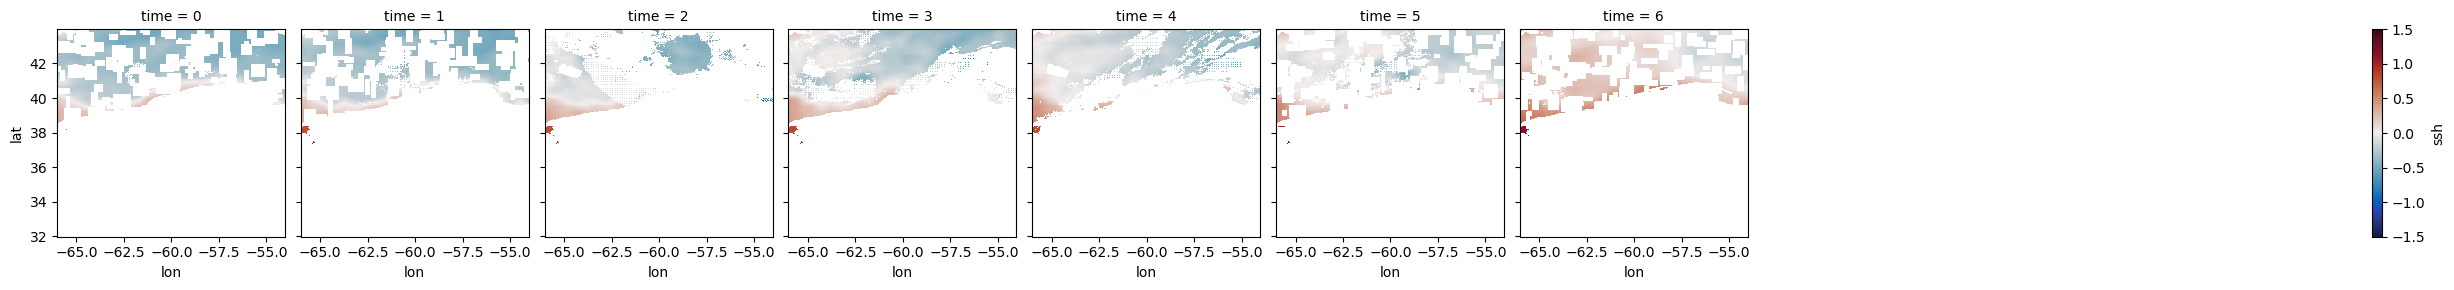

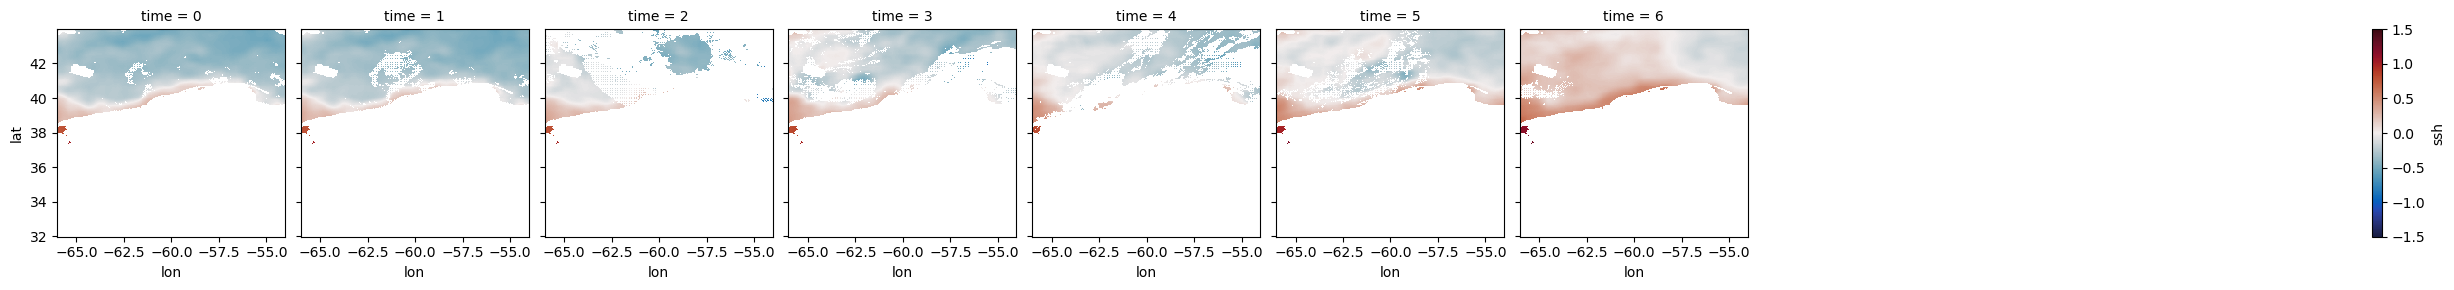

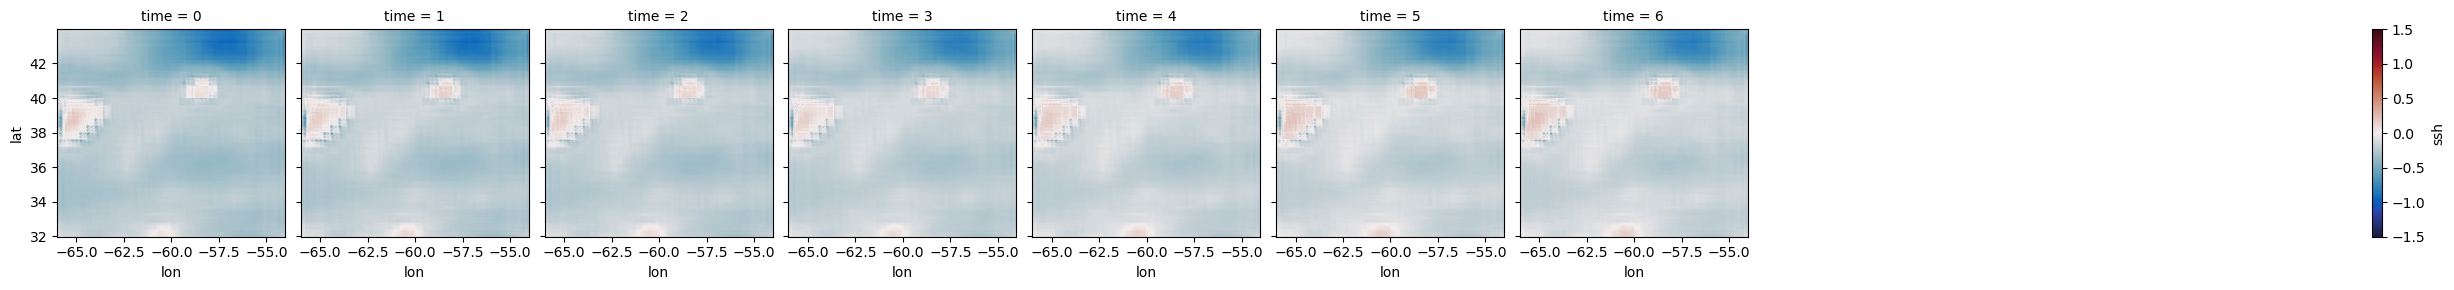

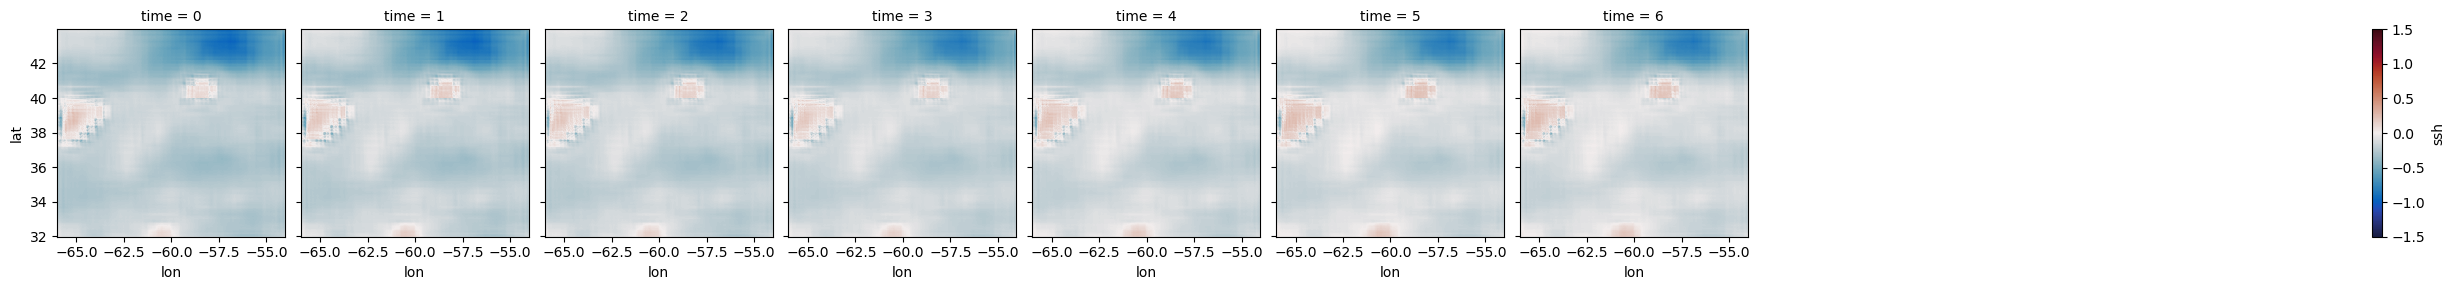

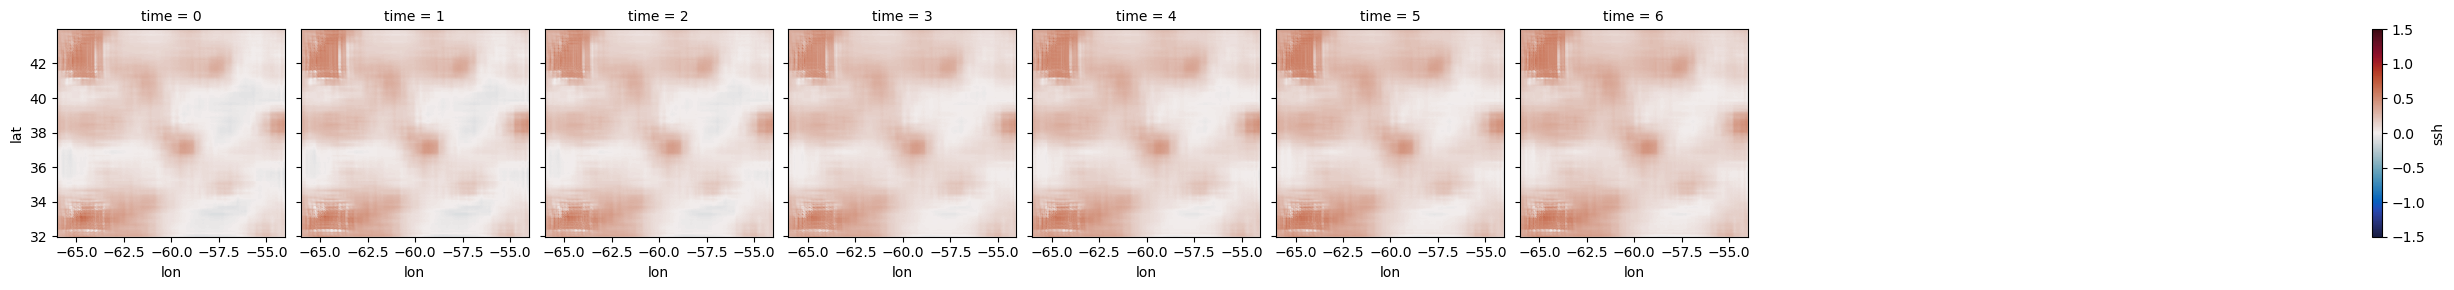

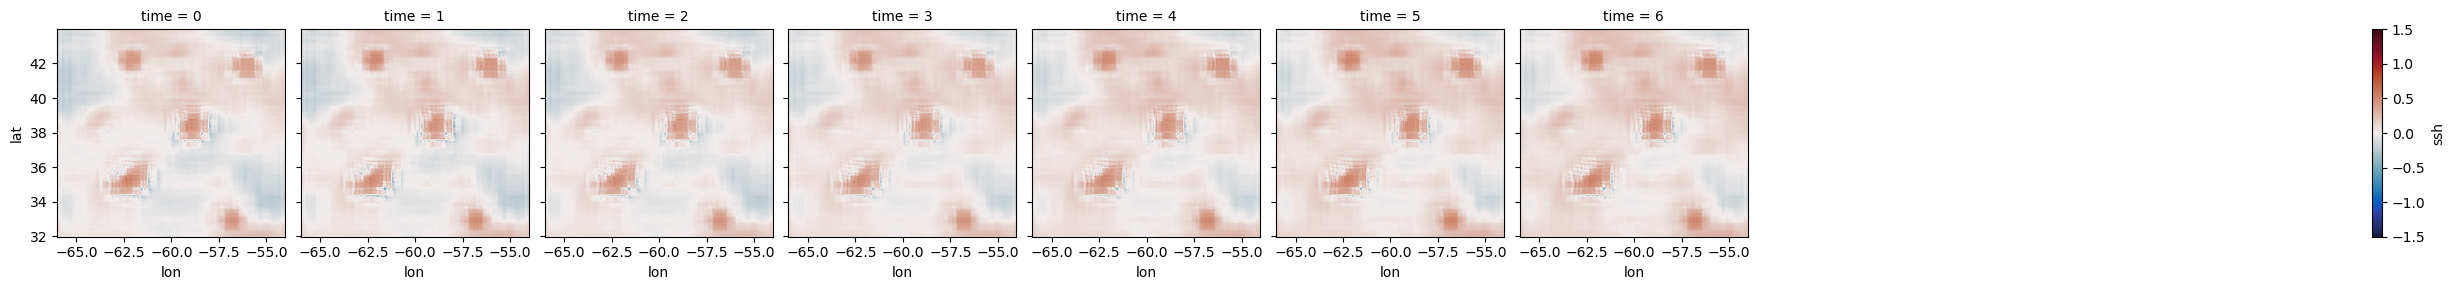

In [35]:
import cmocean as cmo
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),batch[0].detach().cpu()[0])},
           coords={'time':np.arange(7),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=9,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

import cmocean as cmo
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),batch[1].detach().cpu()[0])},
           coords={'time':np.arange(7),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=9,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

z, mean, log_var = vae.encoder(x.nan_to_num().to(device))
x_hat = vae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(7),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=9,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

x_hat = vae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(7),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=9,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

z = torch.Tensor(np.random.normal(size=z.size(), scale=1.0)).to(device)
x_hat = vae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(7),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=9,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

z = torch.Tensor(np.random.normal(size=z.size(), scale=1.0)).to(device)
x_hat = vae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(7),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=9,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()